In [1]:
# Created by: Sergiu Iatco | 2022.12.16 | Romania
# https://people.sap.com/sergiu.iatco
# https://ro.linkedin.com/in/sergiuiatco
# My first SAP HANA ML challendge and project

# My focus is on relaible best STATISTICS
# When SUPPORT No <> SUPPORT Yes I can rely for only on RECALL Yes and RECALL No.
# When SUPPORT No = SUPPORT Yes I can rely on all statistics.
# Collect statistics from all models, compare and select.
# Provide top of models by features to use in different scenarios.
# Provide voting of models and contribution of features to average stochastic results.
# Shake hand with developer and integrate in applications.

# SAP HANA ML Challenge
“I quit!” – How to predict employee churn | SAP HANA Cloud Machine Learning Challenge

https://blogs.sap.com/2022/11/28/i-quit-how-to-predict-employee-churn-sap-hana-cloud-machine-learning-challenge/

### Documentation
-  SAP HANA Python Client API for Machine Learning Algorithms:
   https://pypi.org/project/hana-ml/

-  SAP HANA Automated Predictive Library (APL):  
   https://help.sap.com/doc/1d0ebfe5e8dd44d09606814d83308d4b/2.0.06/en-US/hana_ml.algorithms.apl.html
   
-  SAP HANA Predictive Analysis Library (PAL):
   https://help.sap.com/doc/1d0ebfe5e8dd44d09606814d83308d4b/2.0.06/en-US/hana_ml.algorithms.pal.html
   
-  Package Dependencies: 
   https://help.sap.com/doc/1d0ebfe5e8dd44d09606814d83308d4b/2.0.06/en-US/Installation.html
   
-  Examples:

   https://github.com/SAP-samples/hana-ml-samples/tree/main/Python-API/pal/notebooks

   https://github.com/SAP-samples/hana-ml-samples/tree/main/Python-API/usecase-examples/sapcommunity-hanaml-challenge
   

### SAP HANA ML Library
I will be using the 'SAP HANA Python Client API for Machine Learning Algorithm'. See the notebook "10 Connectivity Check" that you are using the approviate version of that package.

In [2]:
# !pip install hana-ml --upgrade

In [3]:
import hana_ml
print(hana_ml.__version__)

2.14.22102800


### Load the CSV file into a Python object (Pandas DataFrame) 
#### Trainning data - Emp_Churn_Train.csv

In [4]:
# INITIAL DATA
import pandas as pd
df_data = pd.read_csv(r'Emp_Churn_Train.csv', sep = ',')
df_data.head(5)

,EMPLOYEE_ID,AGE,AGE_GROUP10,AGE_GROUP5,GENERATION,CRITICAL_JOB_ROLE,RISK_OF_LOSS,IMPACT_OF_LOSS,FUTURE_LEADER,GENDER,...,CURRENT_COUNTRY,CURCOUNTRYLAT,CURCOUNTRYLON,PROMOTION_WITHIN_LAST_3_YEARS,CHANGED_POSITION_WITHIN_LAST_2_YEARS,CHANGE_IN_PERFORMANCE_RATING,FUNCTIONALAREACHANGETYPE,JOBLEVELCHANGETYPE,HEADS,FLIGHT_RISK
0,10032,33,(25-35],(30-35],Generation Y,Critical,High,High,No Future Leader,Female,...,USA,39.78373,-100.445882,No Promotion,No Change,0 - Not available,No change,No change,1,No
1,10033,43,(35-45],(40-45],Generation X,Critical,Low,High,No Future Leader,Female,...,Germany,51.08342,10.423447,No Promotion,No Change,0 - Not available,No change,No change,1,No
2,10034,33,(25-35],(30-35],Generation Y,Critical,Medium,High,No Future Leader,Female,...,USA,39.78373,-100.445882,No Promotion,No Change,0 - Not available,External Hire,External Hire,1,No
3,10035,33,(25-35],(30-35],Generation Y,Critical,High,High,No Future Leader,Male,...,USA,39.78373,-100.445882,No Promotion,No Change,0 - Not available,No change,No change,1,No
4,10036,33,(25-35],(30-35],Generation Y,Critical,Low,Low,No Future Leader,Male,...,USA,39.78373,-100.445882,No Promotion,No Change,0 - Not available,No change,No change,1,Yes


In [5]:
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.duplicated.html
df_data[df_data.duplicated()]

,EMPLOYEE_ID,AGE,AGE_GROUP10,AGE_GROUP5,GENERATION,CRITICAL_JOB_ROLE,RISK_OF_LOSS,IMPACT_OF_LOSS,FUTURE_LEADER,GENDER,...,CURRENT_COUNTRY,CURCOUNTRYLAT,CURCOUNTRYLON,PROMOTION_WITHIN_LAST_3_YEARS,CHANGED_POSITION_WITHIN_LAST_2_YEARS,CHANGE_IN_PERFORMANCE_RATING,FUNCTIONALAREACHANGETYPE,JOBLEVELCHANGETYPE,HEADS,FLIGHT_RISK


In [6]:
df_data[['HEADS']].value_counts()

HEADS
1        19115
dtype: int64

In [7]:
df_data.shape # rows and columns

(19115, 43)

In [8]:
df_data.dtypes

EMPLOYEE_ID                               int64
AGE                                       int64
AGE_GROUP10                              object
AGE_GROUP5                               object
GENERATION                               object
CRITICAL_JOB_ROLE                        object
RISK_OF_LOSS                             object
IMPACT_OF_LOSS                           object
FUTURE_LEADER                            object
GENDER                                   object
MGR_EMP                                  object
MINORITY                                 object
TENURE_MONTHS                             int64
TENURE_INTERVAL_YEARS                    object
TENURE_INTERVALL_DESC                    object
SALARY                                    int64
EMPLOYMENT_TYPE                          object
EMPLOYMENT_TYPE_2                        object
HIGH_POTENTIAL                           object
PREVIOUS_FUNCTIONAL_AREA                 object
PREVIOUS_JOB_LEVEL                      

### Transform the data
Before uploading the data to SAP HANA Cloud, carry out a few transformations. Turn the column headers into upper case.

In [9]:
df_data.columns = map(str.upper, df_data.columns)
df_data.head(5)

,EMPLOYEE_ID,AGE,AGE_GROUP10,AGE_GROUP5,GENERATION,CRITICAL_JOB_ROLE,RISK_OF_LOSS,IMPACT_OF_LOSS,FUTURE_LEADER,GENDER,...,CURRENT_COUNTRY,CURCOUNTRYLAT,CURCOUNTRYLON,PROMOTION_WITHIN_LAST_3_YEARS,CHANGED_POSITION_WITHIN_LAST_2_YEARS,CHANGE_IN_PERFORMANCE_RATING,FUNCTIONALAREACHANGETYPE,JOBLEVELCHANGETYPE,HEADS,FLIGHT_RISK
0,10032,33,(25-35],(30-35],Generation Y,Critical,High,High,No Future Leader,Female,...,USA,39.78373,-100.445882,No Promotion,No Change,0 - Not available,No change,No change,1,No
1,10033,43,(35-45],(40-45],Generation X,Critical,Low,High,No Future Leader,Female,...,Germany,51.08342,10.423447,No Promotion,No Change,0 - Not available,No change,No change,1,No
2,10034,33,(25-35],(30-35],Generation Y,Critical,Medium,High,No Future Leader,Female,...,USA,39.78373,-100.445882,No Promotion,No Change,0 - Not available,External Hire,External Hire,1,No
3,10035,33,(25-35],(30-35],Generation Y,Critical,High,High,No Future Leader,Male,...,USA,39.78373,-100.445882,No Promotion,No Change,0 - Not available,No change,No change,1,No
4,10036,33,(25-35],(30-35],Generation Y,Critical,Low,Low,No Future Leader,Male,...,USA,39.78373,-100.445882,No Promotion,No Change,0 - Not available,No change,No change,1,Yes


### Upload the data to SAP HANA
I am happy with the data, so upload it to SAP HANA. Establish a connection with the hana_ml wrapper…

In [10]:
df_data.isnull().sum()

EMPLOYEE_ID                                0
AGE                                        0
AGE_GROUP10                                0
AGE_GROUP5                                 0
GENERATION                                 0
CRITICAL_JOB_ROLE                          0
RISK_OF_LOSS                               0
IMPACT_OF_LOSS                             0
FUTURE_LEADER                              0
GENDER                                     0
MGR_EMP                                    0
MINORITY                                   0
TENURE_MONTHS                              0
TENURE_INTERVAL_YEARS                      0
TENURE_INTERVALL_DESC                      0
SALARY                                     0
EMPLOYMENT_TYPE                            0
EMPLOYMENT_TYPE_2                          0
HIGH_POTENTIAL                             0
PREVIOUS_FUNCTIONAL_AREA                6521
PREVIOUS_JOB_LEVEL                      6521
PREVIOUS_CAREER_PATH                    6521
PREVIOUS_P

In [11]:
# import numpy as np
# df_data = df_data.replace(to_replace = np.nan, value = '999')
# perform with hana

In [12]:
hana_address = '********-****-****-****-************.hna1.prod-eu10.hanacloud.ondemand.com' 
hana_port = 443 # Adjust if needed / as advised
hana_user = '******' 
hana_password = '****** 
hana_encrypt = 'true' # Adjust if needed / as advised

import hana_ml.dataframe as dataframe

# Instantiate connection object
conn = dataframe.ConnectionContext(address = hana_address,
                                   port = 443, 
                                   user = hana_user, 
                                   password = hana_password, 
                                   encrypt = hana_encrypt,
                                   sslValidateCertificate = 'false' 
                                  )


# Control connection
conn.connection.isconnected()

True

...and upload the Pandas DataFrame into a table called after your Username. 

In [13]:
hana_tab = "CHURN"
df_remote = dataframe.create_dataframe_from_pandas(connection_context = conn, 
                                                   pandas_df = df_data, 
                                                   table_name = hana_tab,
                                                   force = True,
                                                   replace = False)

100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:07<00:00,  7.15s/it]


Close the connection.

In [14]:
# Creating a dataframe using SAP HANA Cloud table specification
df_remote = conn.table(hana_tab)
df_remote.select_statement

'SELECT * FROM "CHURN"'

In [15]:
df_remote.hasna()

True

In [16]:
df_remote.head(3).collect()

,EMPLOYEE_ID,AGE,AGE_GROUP10,AGE_GROUP5,GENERATION,CRITICAL_JOB_ROLE,RISK_OF_LOSS,IMPACT_OF_LOSS,FUTURE_LEADER,GENDER,...,CURRENT_COUNTRY,CURCOUNTRYLAT,CURCOUNTRYLON,PROMOTION_WITHIN_LAST_3_YEARS,CHANGED_POSITION_WITHIN_LAST_2_YEARS,CHANGE_IN_PERFORMANCE_RATING,FUNCTIONALAREACHANGETYPE,JOBLEVELCHANGETYPE,HEADS,FLIGHT_RISK
0,10032,33,(25-35],(30-35],Generation Y,Critical,High,High,No Future Leader,Female,...,USA,39.78373,-100.445882,No Promotion,No Change,0 - Not available,No change,No change,1,No
1,10033,43,(35-45],(40-45],Generation X,Critical,Low,High,No Future Leader,Female,...,Germany,51.08342,10.423447,No Promotion,No Change,0 - Not available,No change,No change,1,No
2,10034,33,(25-35],(30-35],Generation Y,Critical,Medium,High,No Future Leader,Female,...,USA,39.78373,-100.445882,No Promotion,No Change,0 - Not available,External Hire,External Hire,1,No


In [17]:
# ADDITIONAL DATA COLLECTED
import pandas as pd
df_data_add = pd.read_csv(r'Emp_Churn_Additional_Features.csv', sep = ',')
df_data_add.head(3)

,ID,LINKEDIN,HRTRAINING,SICKDAYS
0,10032,Yes,Yes,10
1,10033,No,No,6
2,10034,Yes,No,5


In [18]:
df_data_add.isnull().sum() # check null data

ID            0
LINKEDIN      0
HRTRAINING    0
SICKDAYS      0
dtype: int64

In [19]:
df_data_add.shape, df_remote.shape # check rows and columns

((19115, 4), [19115, 43])

In [20]:
hana_tab_add = "CHURN_ADD"
df_remote_add = dataframe.create_dataframe_from_pandas(connection_context = conn, 
                                                   pandas_df = df_data_add, 
                                                   table_name = hana_tab_add,
                                                   force = True,
                                                   replace = False)

100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  1.92it/s]


In [21]:
# Creating a dataframe using SAP HANA Cloud table specification
df_remote_add = conn.table(hana_tab_add)
df_remote_add.select_statement

'SELECT * FROM "CHURN_ADD"'

In [22]:
df_remote.head(3).collect()

,EMPLOYEE_ID,AGE,AGE_GROUP10,AGE_GROUP5,GENERATION,CRITICAL_JOB_ROLE,RISK_OF_LOSS,IMPACT_OF_LOSS,FUTURE_LEADER,GENDER,...,CURRENT_COUNTRY,CURCOUNTRYLAT,CURCOUNTRYLON,PROMOTION_WITHIN_LAST_3_YEARS,CHANGED_POSITION_WITHIN_LAST_2_YEARS,CHANGE_IN_PERFORMANCE_RATING,FUNCTIONALAREACHANGETYPE,JOBLEVELCHANGETYPE,HEADS,FLIGHT_RISK
0,10032,33,(25-35],(30-35],Generation Y,Critical,High,High,No Future Leader,Female,...,USA,39.78373,-100.445882,No Promotion,No Change,0 - Not available,No change,No change,1,No
1,10033,43,(35-45],(40-45],Generation X,Critical,Low,High,No Future Leader,Female,...,Germany,51.08342,10.423447,No Promotion,No Change,0 - Not available,No change,No change,1,No
2,10034,33,(25-35],(30-35],Generation Y,Critical,Medium,High,No Future Leader,Female,...,USA,39.78373,-100.445882,No Promotion,No Change,0 - Not available,External Hire,External Hire,1,No


In [23]:
df_remote_add.shape # hana df rows and columns

[19115, 4]

In [24]:
df_remote_add.head(3).collect()

,ID,LINKEDIN,HRTRAINING,SICKDAYS
0,10032,Yes,Yes,10
1,10033,No,No,6
2,10034,Yes,No,5


In [25]:
df_remote_add.hasna()

False

In [26]:
# EDA features distributions
col_exc = ['ID']
for col in df_remote_add.columns:
    if col not in col_exc:
        print(df_remote_add.agg([('count', col, 'Count')], group_by=col).collect())

  LINKEDIN  Count
0      Yes   9627
1       No   9488
  HRTRAINING  Count
0        Yes   6859
1         No  12256
    SICKDAYS  Count
0          8   1947
1         16    431
2          7   1476
3          2     77
4         11   2278
5         17    262
6         21     16
7         15    774
8         24      1
9         26      2
10        23      6
11        18    154
12        27      1
13        19     96
14         0      7
15         4    304
16         1     34
17         9   2291
18         6    989
19        10   2446
20         3    164
21        22     15
22        20     32
23         5    635
24        13   1529
25        12   1935
26        25      1
27        14   1212


In [27]:
# Replace ID with EMPLOYEE_ID
df_remote_add = df_remote_add.rename_columns({'ID':'EMPLOYEE_ID'})
df_remote_add.head(3).collect()

,EMPLOYEE_ID,LINKEDIN,HRTRAINING,SICKDAYS
0,10032,Yes,Yes,10
1,10033,No,No,6
2,10034,Yes,No,5


In [28]:
df_remote.distinct().shape, df_remote.shape #check row duplicates

([19115, 43], [19115, 43])

In [29]:
# EDA features distributions
col_exc = ['EMPLOYEE_ID']
for col in df_remote.columns:
    if col not in col_exc:
        print(df_remote.agg([('count', col, 'Count')], group_by=col).collect())

    AGE  Count
0    32    561
1    46    497
2    48    562
3    36    481
4    45    646
5    33    674
6    28    489
7    42    652
8    53    253
9    21    289
10   44    685
11   24    249
12   31    497
13   26    427
14   23    289
15   30    437
16   55    274
17   29    436
18   18     69
19   41    799
20   39    830
21   37    734
22   40    634
23   38    875
24   34    643
25   43    750
26   49    651
27   51    418
28   50    746
29   56    275
30   22    222
31   47    734
32   57    131
33   20    155
34   54    324
35   25    264
36   52    391
37   19     80
38   27    367
39   35    625
  AGE_GROUP10  Count
0     (45-55]   4850
1     (25-35]   5156
2     (35-45]   7086
3      (0-25]   1617
4       (55+]    406
  AGE_GROUP5  Count
0     (0-20]    304
1    (45-50]   3190
2    (40-45]   3532
3    (35-40]   3554
4    (25-30]   2156
5      (55+]    406
6    (30-35]   3000
7    (50-55]   1660
8    (20-25]   1313
     GENERATION  Count
0  Generation Z   1353
1  Generation

    TIMEINPREVPOSITIONMONTH  Count
0                        32     16
1                         8    264
2                       240      1
3                        16     23
4                         7    973
5                        48     54
6                         2   1115
7                        36    928
8                        33    635
9                        28     37
10                       42     24
11                       53     55
12                       72     10
13                       17     37
14                       21     19
15                       55   1000
16                       24    884
17                       31     59
18                       26    245
19                       23     20
20                       30     18
21                       15    354
22                       29    305
23                       44      1
24                       18    675
25                       41     22
26                       39     37
27                  

   HEADS  Count
0      1  19115
  FLIGHT_RISK  Count
0          No  17015
1         Yes   2100


In [30]:
df_remote.hasna()

True

In [31]:
# replace NA
df_remote = df_remote.fillna(-999)
df_remote = df_remote.fillna("-999")

In [32]:
# diabetes_hdf.hasna()
df_remote.hasna()

False

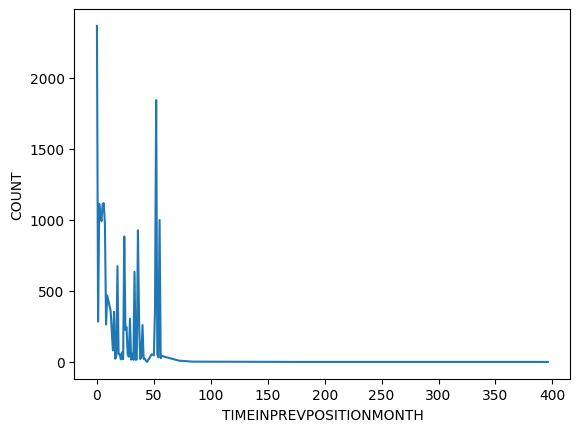

In [33]:
# !pip install seaborn
# EDA TIMEINPREVPOSITIONMONTH
import seaborn as sns
import matplotlib.pyplot as plt
col_to_bin = 'TIMEINPREVPOSITIONMONTH'
df_time_prev = df_remote.agg([('count', col_to_bin, 'COUNT')], group_by=col_to_bin).collect().sort_values(by = 'COUNT')
sns.lineplot(x=col_to_bin, y='COUNT', data=df_time_prev)
plt.show()

In [34]:
# TIMEINPREVPOSITIONMONTH - feature engineering group in intervals
# I will check by importance if this mattters
    
df_remote = df_remote.select \
    ('*',("""CASE WHEN TIMEINPREVPOSITIONMONTH <=12 THEN 'PREV_POS (,12]'
                  WHEN TIMEINPREVPOSITIONMONTH > 12 AND TIMEINPREVPOSITIONMONTH <=24 THEN 'PREV_POS (12,24]'
                  WHEN TIMEINPREVPOSITIONMONTH > 24 AND TIMEINPREVPOSITIONMONTH <=36 THEN 'PREV_POS (24,36]'
                  WHEN TIMEINPREVPOSITIONMONTH > 36 AND TIMEINPREVPOSITIONMONTH <=48 THEN 'PREV_POS (36,48]'
                  WHEN TIMEINPREVPOSITIONMONTH > 48 AND TIMEINPREVPOSITIONMONTH <=60 THEN 'PREV_POS (48,60]'
                  WHEN TIMEINPREVPOSITIONMONTH > 60 THEN 'TIMEPREV_POS (60,]'
              END""",'TIMEINPREVPOS_INT'))
df_remote = df_remote.to_tail('FLIGHT_RISK')
df_remote.head(3).collect()

,EMPLOYEE_ID,AGE,AGE_GROUP10,AGE_GROUP5,GENERATION,CRITICAL_JOB_ROLE,RISK_OF_LOSS,IMPACT_OF_LOSS,FUTURE_LEADER,GENDER,...,CURCOUNTRYLAT,CURCOUNTRYLON,PROMOTION_WITHIN_LAST_3_YEARS,CHANGED_POSITION_WITHIN_LAST_2_YEARS,CHANGE_IN_PERFORMANCE_RATING,FUNCTIONALAREACHANGETYPE,JOBLEVELCHANGETYPE,HEADS,TIMEINPREVPOS_INT,FLIGHT_RISK
0,10032,33,(25-35],(30-35],Generation Y,Critical,High,High,No Future Leader,Female,...,39.78373,-100.445882,No Promotion,No Change,0 - Not available,No change,No change,1,"PREV_POS (,12]",No
1,10033,43,(35-45],(40-45],Generation X,Critical,Low,High,No Future Leader,Female,...,51.08342,10.423447,No Promotion,No Change,0 - Not available,No change,No change,1,"PREV_POS (,12]",No
2,10034,33,(25-35],(30-35],Generation Y,Critical,Medium,High,No Future Leader,Female,...,39.78373,-100.445882,No Promotion,No Change,0 - Not available,External Hire,External Hire,1,"PREV_POS (,12]",No


In [35]:
# EDA created groups
col = 'TIMEINPREVPOS_INT'
df_remote.agg([('count', col, 'Count')], group_by=col).collect()

,TIMEINPREVPOS_INT,Count
0,"TIMEPREV_POS (60,]",17
1,"PREV_POS (48,60]",3462
2,"PREV_POS (,12]",10088
3,"PREV_POS (12,24]",2275
4,"PREV_POS (36,48]",715
5,"PREV_POS (24,36]",2558


In [36]:
# Check header
df_remote.head(3).collect()

,EMPLOYEE_ID,AGE,AGE_GROUP10,AGE_GROUP5,GENERATION,CRITICAL_JOB_ROLE,RISK_OF_LOSS,IMPACT_OF_LOSS,FUTURE_LEADER,GENDER,...,CURCOUNTRYLAT,CURCOUNTRYLON,PROMOTION_WITHIN_LAST_3_YEARS,CHANGED_POSITION_WITHIN_LAST_2_YEARS,CHANGE_IN_PERFORMANCE_RATING,FUNCTIONALAREACHANGETYPE,JOBLEVELCHANGETYPE,HEADS,TIMEINPREVPOS_INT,FLIGHT_RISK
0,10032,33,(25-35],(30-35],Generation Y,Critical,High,High,No Future Leader,Female,...,39.78373,-100.445882,No Promotion,No Change,0 - Not available,No change,No change,1,"PREV_POS (,12]",No
1,10033,43,(35-45],(40-45],Generation X,Critical,Low,High,No Future Leader,Female,...,51.08342,10.423447,No Promotion,No Change,0 - Not available,No change,No change,1,"PREV_POS (,12]",No
2,10034,33,(25-35],(30-35],Generation Y,Critical,Medium,High,No Future Leader,Female,...,39.78373,-100.445882,No Promotion,No Change,0 - Not available,External Hire,External Hire,1,"PREV_POS (,12]",No


In [37]:
# Define variables for ID and target
tab_id = 'EMPLOYEE_ID'
target = "FLIGHT_RISK"

In [38]:
# Show column descriptive statistics using the describe method
df_remote.describe().head(10).collect()

,column,count,unique,nulls,mean,std,min,max,median,25_percent_cont,25_percent_disc,50_percent_cont,50_percent_disc,75_percent_cont,75_percent_disc
0,EMPLOYEE_ID,19115,19115,0,19589.000000,5518.169533,10032.000000,29146.000000,19589.000000,14810.500000,14810.000000,19589.000000,19589.000000,24367.500000,24368.000000
1,AGE,19115,40,0,39.074915,9.188863,18.000000,57.000000,39.000000,32.000000,32.000000,39.000000,39.000000,46.000000,46.000000
2,TENURE_MONTHS,19115,472,0,140.363484,103.163766,1.000000,486.000000,120.000000,55.000000,55.000000,120.000000,120.000000,209.000000,209.000000
3,SALARY,19115,14,0,62003.159822,24708.791838,4900.000000,120000.000000,63000.000000,40000.000000,40000.000000,63000.000000,63000.000000,70000.000000,70000.000000
4,PREVCOUNTRYLAT,19115,56,0,-315.261767,492.253418,-999.000000,64.686314,35.000074,-999.000000,-999.000000,35.000074,35.000074,51.083420,51.083420
5,PREVCOUNTRYLON,19115,56,0,-336.877735,479.979973,-999.000000,172.834408,-53.200000,-999.000000,-999.000000,-53.200000,-53.200000,10.423447,10.423447
6,TIMEINPREVPOSITIONMONTH,19115,58,0,19.885901,19.864530,0.000000,396.000000,9.000000,3.000000,3.000000,9.000000,9.000000,36.000000,36.000000
7,CURCOUNTRYLAT,19115,55,0,39.749109,18.354538,-41.500083,64.686314,46.603354,36.574844,36.574844,46.603354,46.603354,51.083420,51.083420
8,CURCOUNTRYLON,19115,55,0,4.282763,69.918683,-107.991707,172.834408,10.423447,-7.979460,-7.979460,10.423447,10.423447,25.920916,25.920916
9,HEADS,19115,1,0,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [39]:
# CLASSES count
df_remote.agg([('count', tab_id, 'COUNT')], group_by=target).collect()

,FLIGHT_RISK,COUNT
0,No,17015
1,Yes,2100


In [40]:
# CLASSES are imbalanced

In [41]:
# Quick tests with less data
test_rows = 100000
try:
    df_remote_keep_shape = df_remote_keep.shape
except:
    df_remote_keep = df_remote
    
df_remote = df_remote_keep.head(test_rows) # quick tests
df_remote.shape, df_remote_keep.shape

([19115, 44], [19115, 44])

In [42]:
# Partition the input data set
# default: training_percentage = 0.8, testing_percentage = 0.1, validation_percentage = 0.1
from hana_ml.algorithms.pal.partition import train_test_val_split as split
d_train, d_test, d_val = split( data=df_remote, partition_method='stratified', stratified_column=target, validation_percentage = 0)

In [43]:
# help(split)

In [44]:
d_train.shape, d_test.shape, d_val.shape

([15292, 44], [1912, 44], [0, 44])

In [45]:
# This is a classification task - I will use a classification predictive modeling 

In [46]:
# Use UnifiedClassification PAL procedure interface in Python
from hana_ml.algorithms.pal.unified_classification import UnifiedClassification
# Iterate over different Paremeter Settings of the Algorithm, find best setting
from hana_ml.algorithms.pal.model_selection import GridSearchCV

In [47]:
# Function to use repeatedly
def model_fit(d_train):
#     global target, tab_id
    HGBT_MODEL = UnifiedClassification('HybridGradientBoostingTree')

    MODEL_SEARCH = GridSearchCV(estimator=HGBT_MODEL, 
                        param_grid={'learning_rate': [0.1, 0.4, 0.7, 1],
                                    'n_estimators': [4, 6, 8, 10],
                                    'split_threshold': [0.1, 0.4, 0.7, 1]},
                        train_control=dict(fold_num=5,
                                           resampling_method='cv',
                                           random_state=1,
                                           ref_metric=['auc']),
                        scoring='error_rate')

    MODEL_SEARCH.fit(data=d_train, key= tab_id,
             label=target,
             partition_method='stratified',
             partition_random_state=1,
             stratified_column=target,
             build_report=False,
             training_percent = 0.8 ) # added SIATCO default 0.8)
    return HGBT_MODEL

In [48]:
# help(HGBT_MODEL)

In [49]:
%%time
# First FIT of INITIAL DATA
HGBT_MODEL = model_fit(d_train)

CPU times: total: 0 ns
Wall time: 49.4 s


### [Confusion matrix - Wikipedia](https://en.wikipedia.org/wiki/Confusion_matrix)

In [50]:
# CHEAT SHEET
# HGBT_MODEL.confusion_matrix_.collect()
# HGBT_MODEL.statistics_.collect()
# HGBT_MODEL.metrics_.collect()
# HGBT_MODEL.optimal_param_.collect()
# HGBT_MODEL.model_[3].collect() #confusion matrix from model_ # method from list
HGBT_MODEL.confusion_matrix_.collect()

,ACTUAL_CLASS,PREDICTED_CLASS,COUNT
0,No,No,2711
1,No,Yes,11
2,Yes,No,220
3,Yes,Yes,116


In [51]:
HGBT_MODEL.confusion_matrix_.agg([('sum', 'COUNT', 'COUNT')], group_by='ACTUAL_CLASS').collect()

,ACTUAL_CLASS,COUNT
0,No,2722
1,Yes,336


In [52]:
# Majority class: Minority class = No : Yes

In [53]:
# The task is to predict Minority class No. Classes are imbalanced.
# I will rely on RECALL for Yes. TRUE Yes rate. Missed rate. Underestimation.
# PRECISION for Yes. False alarm. Overestimation. Increased because of No class increased RECALL. Msseed rate.

In [54]:
HGBT_MODEL.confusion_matrix_.collect()['COUNT'].sum()

3058

In [55]:
d_train.shape, int(d_train.shape[0] * 0.2) #check the validation test rows

([15292, 44], 3058)

In [56]:
HGBT_MODEL.statistics_.collect() # MODEL statistics

,STAT_NAME,STAT_VALUE,CLASS_NAME
0,AUC,0.974370583799326,None
1,RECALL,0.9959588537839824,No
2,PRECISION,0.9249402934152167,No
3,F1_SCORE,0.9591367415531578,No
4,SUPPORT,2722,No
5,RECALL,0.34523809523809523,Yes
6,PRECISION,0.9133858267716536,Yes
7,F1_SCORE,0.5010799136069115,Yes
8,SUPPORT,336,Yes
9,ACCURACY,0.9244604316546763,None


In [57]:
# MODEL RECALL Yes  ~ 0.37. low

In [58]:
# function for predicted score to use repeatedly
def f_score_res(model,d_test): 
    return model.score(d_test, key=tab_id,  top_k_attributions=10)

In [59]:
d_test.shape

[1912, 44]

In [60]:
d_test.agg([('count', tab_id, 'COUNT')], group_by=target).collect() # check SUPPORT No and SUPPORT Yes

,FLIGHT_RISK,COUNT
0,No,1702
1,Yes,210


In [61]:
f_score_res(HGBT_MODEL,d_test)[1].collect()

,STAT_NAME,STAT_VALUE,CLASS_NAME
0,AUC,0.9733009204145586,None
1,RECALL,0.9964747356051704,No
2,PRECISION,0.9247546346782988,No
3,F1_SCORE,0.9592760180995475,No
4,SUPPORT,1702,No
5,RECALL,0.34285714285714286,Yes
6,PRECISION,0.9230769230769231,Yes
7,F1_SCORE,0.5000000000000001,Yes
8,SUPPORT,210,Yes
9,ACCURACY,0.9246861924686193,None


In [62]:
# Predicted RECALL Yes  ~ 0.31.  low. True Yes rate. Missed. Underestimation.
# Predicted PRECISON Yes. False Yes rate. False alarm. Overestimation. Not reliable SUPPORT Yes < SUPPORT No 

In [63]:
# # p_HGBT_MODEL = HGBT_MODEL
# # p_d_test = d_test
# try:
#     del p_HGBT_MODEL
#     del p_d_test
# except:
#     pass

In [64]:
df_model_stat_all = pd.DataFrame()
df_pred_stat_all = pd.DataFrame()
def f_stat_all(p_model, p_d_test, p_col_name):
    global df_model_stat_all
    global df_pred_stat_all
    stat_value = 'STAT_VALUE' 
    cols_order = ['STAT_NAME', 'CLASS_NAME']
    score_res = f_score_res(p_model,p_d_test) # predicted statistics
    if df_model_stat_all.empty and df_pred_stat_all.empty:
        df_model_stat_all = p_model.statistics_.collect()[cols_order]
        df_pred_stat_all = score_res[1].collect()[cols_order]
        
    df_model_stat_all[p_col_name] = p_model.statistics_.collect()[stat_value]
    df_pred_stat_all[p_col_name] = score_res[1].collect()[stat_value]
    
    df_model_stat_all[p_col_name] = df_model_stat_all[p_col_name].str[:6]
    df_pred_stat_all[p_col_name] = df_pred_stat_all[p_col_name].str[:6]
    
    return df_model_stat_all, df_pred_stat_all

df_model_stat_all.empty, df_pred_stat_all.empty

(True, True)

In [65]:
df_model_stat_last, df_pred_stat_last = f_stat_all(HGBT_MODEL, d_test, 'INIT')

In [66]:
df_model_stat_last

,STAT_NAME,CLASS_NAME,INIT
0,AUC,None,0.9743
1,RECALL,No,0.9959
2,PRECISION,No,0.9249
3,F1_SCORE,No,0.9591
4,SUPPORT,No,2722
5,RECALL,Yes,0.3452
6,PRECISION,Yes,0.9133
7,F1_SCORE,Yes,0.5010
8,SUPPORT,Yes,336
9,ACCURACY,None,0.9244


In [67]:
df_pred_stat_last

,STAT_NAME,CLASS_NAME,INIT
0,AUC,None,0.9733
1,RECALL,No,0.9964
2,PRECISION,No,0.9247
3,F1_SCORE,No,0.9592
4,SUPPORT,No,1702
5,RECALL,Yes,0.3428
6,PRECISION,Yes,0.9230
7,F1_SCORE,Yes,0.5000
8,SUPPORT,Yes,210
9,ACCURACY,None,0.9246


In [68]:
# Feature importance
HGBT_MODEL.importance_.sort('IMPORTANCE', desc=True).collect()

,VARIABLE_NAME,IMPORTANCE
0,FUNCTIONALAREACHANGETYPE,0.200987
1,TIMEINPREVPOSITIONMONTH,0.181448
2,EMPLOYMENT_TYPE_2,0.149898
3,PREVCOUNTRYLON,0.064370
4,PROMOTION_WITHIN_LAST_3_YEARS,0.058553
5,SALARY,0.048992
6,JOBLEVELCHANGETYPE,0.047154
7,AGE,0.032812
8,RISK_OF_LOSS,0.027660
9,CHANGE_IN_PERFORMANCE_RATING,0.023107


In [69]:
# TIMEINPREVPOS_INT ~ 22 top

In [70]:
# JOIN ADDITIONAL DATA with INITIAL DATA
df_remote_new = df_remote.set_index(tab_id).join(df_remote_add.set_index(tab_id)) 
df_remote_new.head(3).collect()

,EMPLOYEE_ID,AGE,AGE_GROUP10,AGE_GROUP5,GENERATION,CRITICAL_JOB_ROLE,RISK_OF_LOSS,IMPACT_OF_LOSS,FUTURE_LEADER,GENDER,...,CHANGED_POSITION_WITHIN_LAST_2_YEARS,CHANGE_IN_PERFORMANCE_RATING,FUNCTIONALAREACHANGETYPE,JOBLEVELCHANGETYPE,HEADS,TIMEINPREVPOS_INT,FLIGHT_RISK,LINKEDIN,HRTRAINING,SICKDAYS
0,10032,33,(25-35],(30-35],Generation Y,Critical,High,High,No Future Leader,Female,...,No Change,0 - Not available,No change,No change,1,"PREV_POS (,12]",No,Yes,Yes,10
1,10033,43,(35-45],(40-45],Generation X,Critical,Low,High,No Future Leader,Female,...,No Change,0 - Not available,No change,No change,1,"PREV_POS (,12]",No,No,No,6
2,10034,33,(25-35],(30-35],Generation Y,Critical,Medium,High,No Future Leader,Female,...,No Change,0 - Not available,External Hire,External Hire,1,"PREV_POS (,12]",No,Yes,No,5


In [71]:
df_remote = df_remote_new
df_remote = df_remote.to_tail(target)
df_remote.dtypes() # () list of columns as parameter

[('EMPLOYEE_ID', 'INT', 10, 10, 10, 0),
 ('AGE', 'INT', 10, 10, 10, 0),
 ('AGE_GROUP10', 'NVARCHAR', 5000, 5000, 5000, 0),
 ('AGE_GROUP5', 'NVARCHAR', 5000, 5000, 5000, 0),
 ('GENERATION', 'NVARCHAR', 5000, 5000, 5000, 0),
 ('CRITICAL_JOB_ROLE', 'NVARCHAR', 5000, 5000, 5000, 0),
 ('RISK_OF_LOSS', 'NVARCHAR', 5000, 5000, 5000, 0),
 ('IMPACT_OF_LOSS', 'NVARCHAR', 5000, 5000, 5000, 0),
 ('FUTURE_LEADER', 'NVARCHAR', 5000, 5000, 5000, 0),
 ('GENDER', 'NVARCHAR', 5000, 5000, 5000, 0),
 ('MGR_EMP', 'NVARCHAR', 5000, 5000, 5000, 0),
 ('MINORITY', 'NVARCHAR', 5000, 5000, 5000, 0),
 ('TENURE_MONTHS', 'INT', 10, 10, 10, 0),
 ('TENURE_INTERVAL_YEARS', 'NVARCHAR', 5000, 5000, 5000, 0),
 ('TENURE_INTERVALL_DESC', 'NVARCHAR', 5000, 5000, 5000, 0),
 ('SALARY', 'INT', 10, 10, 10, 0),
 ('EMPLOYMENT_TYPE', 'NVARCHAR', 5000, 5000, 5000, 0),
 ('EMPLOYMENT_TYPE_2', 'NVARCHAR', 5000, 5000, 5000, 0),
 ('HIGH_POTENTIAL', 'NVARCHAR', 5000, 5000, 5000, 0),
 ('PREVIOUS_FUNCTIONAL_AREA', 'NVARCHAR', 5000, 5000, 5

In [72]:
# Partition the input data set
# default: training_percentage = 0.8, testing_percentage = 0.1, validation_percentage = 0.1
from hana_ml.algorithms.pal.partition import train_test_val_split as split
d_train, d_test, d_val = split( data=df_remote, partition_method='stratified', stratified_column=target, validation_percentage = 0)

In [73]:
# shapes with all features
d_train.shape, d_test.shape, d_val.shape

([15292, 47], [1912, 47], [0, 47])

In [74]:
%%time
# fit model with all features
HGBT_MODEL = model_fit(d_train)

CPU times: total: 15.6 ms
Wall time: 52.7 s


In [75]:
HGBT_MODEL.statistics_.collect() # MODEL statistics

,STAT_NAME,STAT_VALUE,CLASS_NAME
0,AUC,0.9830368596495656,None
1,RECALL,0.979059515062454,No
2,PRECISION,0.9531473533619457,No
3,F1_SCORE,0.965929684668358,No
4,SUPPORT,2722,No
5,RECALL,0.6101190476190477,Yes
6,PRECISION,0.7824427480916031,Yes
7,F1_SCORE,0.68561872909699,Yes
8,SUPPORT,336,Yes
9,ACCURACY,0.9385219097449313,None


In [76]:
df_imp = HGBT_MODEL.importance_.sort('IMPORTANCE', desc=True).collect()
df_imp

,VARIABLE_NAME,IMPORTANCE
0,HRTRAINING,0.251717
1,EMPLOYMENT_TYPE_2,0.126701
2,SICKDAYS,0.123949
3,FUNCTIONALAREACHANGETYPE,0.110139
4,TIMEINPREVPOSITIONMONTH,0.080114
5,PROMOTION_WITHIN_LAST_3_YEARS,0.058529
6,PREVCOUNTRYLON,0.031346
7,SALARY,0.027805
8,JOBLEVELCHANGETYPE,0.026785
9,LINKEDIN,0.024140


In [77]:
# features from additional data at top

In [78]:
f_score_res(HGBT_MODEL,d_test)[1].collect() # all features

,STAT_NAME,STAT_VALUE,CLASS_NAME
0,AUC,0.9834299119413176,None
1,RECALL,0.9800235017626322,No
2,PRECISION,0.9488054607508533,No
3,F1_SCORE,0.9641618497109826,No
4,SUPPORT,1702,No
5,RECALL,0.5714285714285714,Yes
6,PRECISION,0.7792207792207793,Yes
7,F1_SCORE,0.6593406593406593,Yes
8,SUPPORT,210,Yes
9,ACCURACY,0.9351464435146444,None


In [79]:
df_model_stat_last, df_pred_stat_last = f_stat_all(HGBT_MODEL, d_test, 'ADD')

In [80]:
df_model_stat_last

,STAT_NAME,CLASS_NAME,INIT,ADD
0,AUC,None,0.9743,0.9830
1,RECALL,No,0.9959,0.9790
2,PRECISION,No,0.9249,0.9531
3,F1_SCORE,No,0.9591,0.9659
4,SUPPORT,No,2722,2722
5,RECALL,Yes,0.3452,0.6101
6,PRECISION,Yes,0.9133,0.7824
7,F1_SCORE,Yes,0.5010,0.6856
8,SUPPORT,Yes,336,336
9,ACCURACY,None,0.9244,0.9385


In [81]:
# MODEL RECALL Yes jumps

In [82]:
df_pred_stat_last

,STAT_NAME,CLASS_NAME,INIT,ADD
0,AUC,None,0.9733,0.9834
1,RECALL,No,0.9964,0.9800
2,PRECISION,No,0.9247,0.9488
3,F1_SCORE,No,0.9592,0.9641
4,SUPPORT,No,1702,1702
5,RECALL,Yes,0.3428,0.5714
6,PRECISION,Yes,0.9230,0.7792
7,F1_SCORE,Yes,0.5000,0.6593
8,SUPPORT,Yes,210,210
9,ACCURACY,None,0.9246,0.9351


In [83]:
# Predicted RECAL Yes jumps

In [84]:
d_test.shape

[1912, 47]

In [85]:
# Reducing the number of features by importance
# Grouping by meaning

In [86]:
col_imp = 'IMPORTANCE'
col_vn = 'VARIABLE_NAME'
df_imp_zero = df_imp[df_imp[col_imp] == 0]
COL_IMP_ZERO = df_imp_zero[col_vn].to_list()
# ['HEADS'] - constant expected zero importance
COL_IMP_ZERO

['HEADS',
 'GENERATION',
 'CURRENT_REGION',
 'TENURE_INTERVALL_DESC',
 'MINORITY',
 'PREVIOUS_JOB_LEVEL',
 'EMPLOYMENT_TYPE',
 'CURRENT_CAREER_PATH']

In [87]:
col_age_dep = ['AGE', 'AGE_GROUP5', 'AGE_GROUP10', 'GENERATION'] # age group
col_age_dep

['AGE', 'AGE_GROUP5', 'AGE_GROUP10', 'GENERATION']

In [88]:
df_imp_age = df_imp[df_imp[col_vn].isin(col_age_dep)].sort_values(by = col_imp, ascending = False) # importance desc
df_imp_age

,VARIABLE_NAME,IMPORTANCE
12,AGE,0.014719
29,AGE_GROUP5,0.001693
31,AGE_GROUP10,0.001586
38,GENERATION,0.000000


In [89]:
COL_IMP_AGE = df_imp_age[col_vn].to_list() # importance desc to list
COL_IMP_AGE

['AGE', 'AGE_GROUP5', 'AGE_GROUP10', 'GENERATION']

In [90]:
col_imp_prev_loc = ['PREVIOUS_COUNTRY', 'PREVCOUNTRYLAT', 'PREVCOUNTRYLON', 'PREVIOUS_REGION'] # previous country group
df_imp_prev_loc = df_imp[df_imp[col_vn].isin(col_imp_prev_loc)].sort_values(by = col_imp, ascending = False)
df_imp_prev_loc

,VARIABLE_NAME,IMPORTANCE
6,PREVCOUNTRYLON,0.031346
16,PREVCOUNTRYLAT,0.005588
26,PREVIOUS_REGION,0.002298
28,PREVIOUS_COUNTRY,0.001721


In [91]:
COL_IMP_PREVIOUS_COUNTRY = df_imp_prev_loc[col_vn].to_list() # importance desc to list
COL_IMP_PREVIOUS_COUNTRY

['PREVCOUNTRYLON', 'PREVCOUNTRYLAT', 'PREVIOUS_REGION', 'PREVIOUS_COUNTRY']

In [92]:
col_imp_curr_loc = ['CURRENT_REGION', 'CURRENT_COUNTRY', 'CURCOUNTRYLAT', 'CURCOUNTRYLON'] # current country group
df_imp_curr_loc = df_imp[df_imp[col_vn].isin(col_imp_curr_loc)].sort_values(by = col_imp, ascending = False)
df_imp_curr_loc

,VARIABLE_NAME,IMPORTANCE
14,CURCOUNTRYLON,0.009911
19,CURRENT_COUNTRY,0.004256
22,CURCOUNTRYLAT,0.003880
39,CURRENT_REGION,0.000000


In [93]:
COL_IMP_CURRENT_REGION = df_imp_curr_loc[col_vn].to_list() # importance desc to list 
COL_IMP_CURRENT_REGION

['CURCOUNTRYLON', 'CURRENT_COUNTRY', 'CURCOUNTRYLAT', 'CURRENT_REGION']

In [94]:
col_imp_tenure = ['TENURE_MONTHS','TENURE_INTERVAL_YEARS','TENURE_INTERVALL_DESC'] # tenure group
df_imp_tenure = df_imp[df_imp[col_vn].isin(col_imp_tenure)].sort_values(by = col_imp, ascending = False)
df_imp_tenure

,VARIABLE_NAME,IMPORTANCE
17,TENURE_MONTHS,0.005014
25,TENURE_INTERVAL_YEARS,0.002486
40,TENURE_INTERVALL_DESC,0.000000


In [95]:
COL_IMP_TENURE = df_imp_tenure[col_vn].to_list() # importance desc to list
COL_IMP_TENURE

['TENURE_MONTHS', 'TENURE_INTERVAL_YEARS', 'TENURE_INTERVALL_DESC']

In [96]:
# function to remove list from another list
def ls_remove(ls, ls_remove):
    for e in ls_remove:
        try:
            ls.remove(e)
        except ValueError:
            print(f"Element {e} is not list") # already deleted or not in found
    return ls

In [97]:
cols_imp = d_train.columns # all columns to list
cols_imp

['EMPLOYEE_ID',
 'AGE',
 'AGE_GROUP10',
 'AGE_GROUP5',
 'GENERATION',
 'CRITICAL_JOB_ROLE',
 'RISK_OF_LOSS',
 'IMPACT_OF_LOSS',
 'FUTURE_LEADER',
 'GENDER',
 'MGR_EMP',
 'MINORITY',
 'TENURE_MONTHS',
 'TENURE_INTERVAL_YEARS',
 'TENURE_INTERVALL_DESC',
 'SALARY',
 'EMPLOYMENT_TYPE',
 'EMPLOYMENT_TYPE_2',
 'HIGH_POTENTIAL',
 'PREVIOUS_FUNCTIONAL_AREA',
 'PREVIOUS_JOB_LEVEL',
 'PREVIOUS_CAREER_PATH',
 'PREVIOUS_PERFORMANCE_RATING',
 'PREVIOUS_COUNTRY',
 'PREVCOUNTRYLAT',
 'PREVCOUNTRYLON',
 'PREVIOUS_REGION',
 'TIMEINPREVPOSITIONMONTH',
 'CURRENT_FUNCTIONAL_AREA',
 'CURRENT_JOB_LEVEL',
 'CURRENT_CAREER_PATH',
 'CURRENT_PERFORMANCE_RATING',
 'CURRENT_REGION',
 'CURRENT_COUNTRY',
 'CURCOUNTRYLAT',
 'CURCOUNTRYLON',
 'PROMOTION_WITHIN_LAST_3_YEARS',
 'CHANGED_POSITION_WITHIN_LAST_2_YEARS',
 'CHANGE_IN_PERFORMANCE_RATING',
 'FUNCTIONALAREACHANGETYPE',
 'JOBLEVELCHANGETYPE',
 'HEADS',
 'TIMEINPREVPOS_INT',
 'LINKEDIN',
 'HRTRAINING',
 'SICKDAYS',
 'FLIGHT_RISK']

In [98]:
d_train[cols_imp].head().collect() #checking columns

,EMPLOYEE_ID,AGE,AGE_GROUP10,AGE_GROUP5,GENERATION,CRITICAL_JOB_ROLE,RISK_OF_LOSS,IMPACT_OF_LOSS,FUTURE_LEADER,GENDER,...,CHANGED_POSITION_WITHIN_LAST_2_YEARS,CHANGE_IN_PERFORMANCE_RATING,FUNCTIONALAREACHANGETYPE,JOBLEVELCHANGETYPE,HEADS,TIMEINPREVPOS_INT,LINKEDIN,HRTRAINING,SICKDAYS,FLIGHT_RISK
0,10032,33,(25-35],(30-35],Generation Y,Critical,High,High,No Future Leader,Female,...,No Change,0 - Not available,No change,No change,1,"PREV_POS (,12]",Yes,Yes,10,No


In [99]:
d_test.shape

[1912, 47]

In [100]:
# Reducing features by group importance
# COL_IMP_ZERO
# COL_IMP_AGE
# COL_IMP_PREVIOUS_COUNTRY
# COL_IMP_CURRENT_REGION
# COL_IMP_TENURE
# COL_IMP_PREVIOUS_COUNTRY = ['PREVIOUS_COUNTRY','PREVCOUNTRYLAT', 'PREVCOUNTRYLON', 'PREVIOUS_REGION']
# COL_IMP_CURRENT_REGION = ['CURRENT_COUNTRY','CURRENT_REGION', 'CURCOUNTRYLAT', 'CURCOUNTRYLON']
cols_imp = d_train.columns
cols_imp = ls_remove(cols_imp, COL_IMP_ZERO) # remove zero importance features
cols_imp = ls_remove(cols_imp, COL_IMP_AGE[1:]) # keep first
cols_imp = ls_remove(cols_imp, COL_IMP_PREVIOUS_COUNTRY[1:]) # keep first
cols_imp = ls_remove(cols_imp, COL_IMP_CURRENT_REGION[1:]) # keep first
cols_imp = ls_remove(cols_imp, COL_IMP_TENURE[1:]) # keep first
# printed element - already removed or not in list
len(cols_imp)

Element GENERATION is not list
Element CURRENT_REGION is not list
Element TENURE_INTERVALL_DESC is not list


31

In [101]:
cols_imp

['EMPLOYEE_ID',
 'AGE',
 'CRITICAL_JOB_ROLE',
 'RISK_OF_LOSS',
 'IMPACT_OF_LOSS',
 'FUTURE_LEADER',
 'GENDER',
 'MGR_EMP',
 'TENURE_MONTHS',
 'SALARY',
 'EMPLOYMENT_TYPE_2',
 'HIGH_POTENTIAL',
 'PREVIOUS_FUNCTIONAL_AREA',
 'PREVIOUS_CAREER_PATH',
 'PREVIOUS_PERFORMANCE_RATING',
 'PREVCOUNTRYLON',
 'TIMEINPREVPOSITIONMONTH',
 'CURRENT_FUNCTIONAL_AREA',
 'CURRENT_JOB_LEVEL',
 'CURRENT_PERFORMANCE_RATING',
 'CURCOUNTRYLON',
 'PROMOTION_WITHIN_LAST_3_YEARS',
 'CHANGED_POSITION_WITHIN_LAST_2_YEARS',
 'CHANGE_IN_PERFORMANCE_RATING',
 'FUNCTIONALAREACHANGETYPE',
 'JOBLEVELCHANGETYPE',
 'TIMEINPREVPOS_INT',
 'LINKEDIN',
 'HRTRAINING',
 'SICKDAYS',
 'FLIGHT_RISK']

In [102]:
%%time
# Fit model with important features
HGBT_MODEL = model_fit(d_train[cols_imp])
d_train[cols_imp].shape

CPU times: total: 0 ns
Wall time: 36.2 s


[15292, 31]

In [103]:
HGBT_MODEL.statistics_.collect()

,STAT_NAME,STAT_VALUE,CLASS_NAME
0,AUC,0.9856558358759214,None
1,RECALL,0.9753857457751653,No
2,PRECISION,0.9567567567567568,No
3,F1_SCORE,0.9659814444242315,No
4,SUPPORT,2722,No
5,RECALL,0.6428571428571429,Yes
6,PRECISION,0.7632508833922261,Yes
7,F1_SCORE,0.6978998384491115,Yes
8,SUPPORT,336,Yes
9,ACCURACY,0.9388489208633094,None


In [104]:
f_score_res(HGBT_MODEL, d_test[cols_imp])[1].collect()

,STAT_NAME,STAT_VALUE,CLASS_NAME
0,AUC,0.9857221949895835,None
1,RECALL,0.9782608695652174,No
2,PRECISION,0.9541547277936963,No
3,F1_SCORE,0.9660574412532638,No
4,SUPPORT,1702,No
5,RECALL,0.6190476190476191,Yes
6,PRECISION,0.7784431137724551,Yes
7,F1_SCORE,0.689655172413793,Yes
8,SUPPORT,210,Yes
9,ACCURACY,0.9388075313807531,None


In [105]:
df_model_stat_last, df_pred_stat_last = f_stat_all(HGBT_MODEL, d_test[cols_imp], 'cols_imp')

In [106]:
df_model_stat_last

,STAT_NAME,CLASS_NAME,INIT,ADD,cols_imp
0,AUC,None,0.9743,0.9830,0.9856
1,RECALL,No,0.9959,0.9790,0.9753
2,PRECISION,No,0.9249,0.9531,0.9567
3,F1_SCORE,No,0.9591,0.9659,0.9659
4,SUPPORT,No,2722,2722,2722
5,RECALL,Yes,0.3452,0.6101,0.6428
6,PRECISION,Yes,0.9133,0.7824,0.7632
7,F1_SCORE,Yes,0.5010,0.6856,0.6978
8,SUPPORT,Yes,336,336,336
9,ACCURACY,None,0.9244,0.9385,0.9388


In [107]:
df_pred_stat_last

,STAT_NAME,CLASS_NAME,INIT,ADD,cols_imp
0,AUC,None,0.9733,0.9834,0.9857
1,RECALL,No,0.9964,0.9800,0.9782
2,PRECISION,No,0.9247,0.9488,0.9541
3,F1_SCORE,No,0.9592,0.9641,0.9660
4,SUPPORT,No,1702,1702,1702
5,RECALL,Yes,0.3428,0.5714,0.6190
6,PRECISION,Yes,0.9230,0.7792,0.7784
7,F1_SCORE,Yes,0.5000,0.6593,0.6896
8,SUPPORT,Yes,210,210,210
9,ACCURACY,None,0.9246,0.9351,0.9388


In [108]:
d_test[cols_imp].shape

[1912, 31]

In [109]:
# Predicted RECALL Yes ~ 0.65 > 0.63.
# Reducing features increases a bit the prediction

In [110]:
# Reducing features with meaning preference
COL_IMP_PREVIOUS_COUNTRY_MEANING = ['PREVIOUS_COUNTRY','PREVCOUNTRYLAT', 'PREVCOUNTRYLON', 'PREVIOUS_REGION']
COL_IMP_CURRENT_REGION_MEANING = ['CURRENT_COUNTRY','CURRENT_REGION', 'CURCOUNTRYLAT', 'CURCOUNTRYLON']
cols_imp_mn = d_train.columns
cols_imp_mn = ls_remove(cols_imp_mn, COL_IMP_ZERO)
cols_imp_mn = ls_remove(cols_imp_mn, COL_IMP_AGE[1:])
cols_imp_mn = ls_remove(cols_imp_mn, COL_IMP_PREVIOUS_COUNTRY_MEANING[1:])
cols_imp_mn = ls_remove(cols_imp_mn, COL_IMP_CURRENT_REGION_MEANING[1:])
cols_imp_mn = ls_remove(cols_imp_mn, COL_IMP_TENURE[1:])
# printed element - already removed or not in list
len(cols_imp_mn)

Element GENERATION is not list
Element CURRENT_REGION is not list
Element TENURE_INTERVALL_DESC is not list


31

In [111]:
%%time
# Fit model with important features by meaning preference
HGBT_MODEL = model_fit(d_train[cols_imp_mn])

CPU times: total: 0 ns
Wall time: 34.3 s


In [112]:
HGBT_MODEL.statistics_.collect() # meaning preference

,STAT_NAME,STAT_VALUE,CLASS_NAME
0,AUC,0.9843125559009359,None
1,RECALL,0.9739162380602499,No
2,PRECISION,0.9529115744069016,No
3,F1_SCORE,0.9632994186046512,No
4,SUPPORT,2722,No
5,RECALL,0.6101190476190477,Yes
6,PRECISION,0.7427536231884058,Yes
7,F1_SCORE,0.6699346405228759,Yes
8,SUPPORT,336,Yes
9,ACCURACY,0.933943754087639,None


In [113]:
d_train[cols_imp_mn].shape

[15292, 31]

In [114]:
f_score_res(HGBT_MODEL, d_test[cols_imp_mn])[1].collect() # meaning preference

,STAT_NAME,STAT_VALUE,CLASS_NAME
0,AUC,0.9870257600094536,None
1,RECALL,0.981198589894242,No
2,PRECISION,0.9548313321898227,No
3,F1_SCORE,0.9678354100260794,No
4,SUPPORT,1702,No
5,RECALL,0.6238095238095238,Yes
6,PRECISION,0.803680981595092,Yes
7,F1_SCORE,0.7024128686327078,Yes
8,SUPPORT,210,Yes
9,ACCURACY,0.9419456066945606,None


In [115]:
df_model_stat_last, df_pred_stat_last = f_stat_all(HGBT_MODEL, d_test[cols_imp_mn], 'cols_imp_mn')

In [116]:
df_model_stat_last

,STAT_NAME,CLASS_NAME,INIT,ADD,cols_imp,cols_imp_mn
0,AUC,None,0.9743,0.9830,0.9856,0.9843
1,RECALL,No,0.9959,0.9790,0.9753,0.9739
2,PRECISION,No,0.9249,0.9531,0.9567,0.9529
3,F1_SCORE,No,0.9591,0.9659,0.9659,0.9632
4,SUPPORT,No,2722,2722,2722,2722
5,RECALL,Yes,0.3452,0.6101,0.6428,0.6101
6,PRECISION,Yes,0.9133,0.7824,0.7632,0.7427
7,F1_SCORE,Yes,0.5010,0.6856,0.6978,0.6699
8,SUPPORT,Yes,336,336,336,336
9,ACCURACY,None,0.9244,0.9385,0.9388,0.9339


In [117]:
df_pred_stat_last

,STAT_NAME,CLASS_NAME,INIT,ADD,cols_imp,cols_imp_mn
0,AUC,None,0.9733,0.9834,0.9857,0.9870
1,RECALL,No,0.9964,0.9800,0.9782,0.9811
2,PRECISION,No,0.9247,0.9488,0.9541,0.9548
3,F1_SCORE,No,0.9592,0.9641,0.9660,0.9678
4,SUPPORT,No,1702,1702,1702,1702
5,RECALL,Yes,0.3428,0.5714,0.6190,0.6238
6,PRECISION,Yes,0.9230,0.7792,0.7784,0.8036
7,F1_SCORE,Yes,0.5000,0.6593,0.6896,0.7024
8,SUPPORT,Yes,210,210,210,210
9,ACCURACY,None,0.9246,0.9351,0.9388,0.9419


In [118]:
# Model RECALL Yes ~ 0.64 almost same

In [119]:
# Predicted RECALL Yes ~ almost same
# cols_imp_mn - prefered to use countries in a natural way
cols_imp_original = cols_imp # keep for tests
cols_imp = cols_imp_mn # swap 

In [120]:
# pred_res.select(tab_id, 'SCORE', 'CONFIDENCE', 'REASON_CODE', 
# # pred_res.select('ID', 'SCORE', 'CONFIDENCE', 'REASON_CODE', 
#                 ('json_query("REASON_CODE", \'$[0].attr\')', 'Top1'), 
#                 ('json_query("REASON_CODE", \'$[0].pct\')', 'PCT_1'), 
#                 ('json_query("REASON_CODE", \'$[1].attr\')', 'Top2'), 
#                 ('json_query("REASON_CODE", \'$[1].pct\')', 'PCT_2') ).head(5).collect()

### [SMOTE Synthetic Minority Over-sampling Technique](https://help.sap.com/doc/1d0ebfe5e8dd44d09606814d83308d4b/2.0.06/en-US/hana_ml.algorithms.pal_algorithm.html?highlight=smote#hana_ml.algorithms.pal.preprocessing.SMOTE)

In [121]:
sm = hana_ml.algorithms.pal.preprocessing.SMOTE

In [122]:
# d_train.agg([('count', target, 'Count')], group_by=target).collect()

In [123]:
# return hana dfh group by class count    
def f_class_count(dfh):
#     global target
    dfh_group_by_class = dfh.agg([('count', target, 'Count')], group_by=target)
    return dfh_group_by_class

In [124]:
f_class_count(d_train).collect()

,FLIGHT_RISK,Count
0,No,13612
1,Yes,1680


In [125]:
d_train.shape

[15292, 47]

In [126]:
# return max smote amount
def f_smote_nmax(dfh):
#     global target
    df_class_count = f_class_count(dfh).collect() #class count
    class_no = df_class_count.loc[df_class_count[target] == 'No']['Count'].values[0] #class No
    class_yes = df_class_count.loc[df_class_count[target] == 'Yes']['Count'].values[0] #class Yes
    smote_nmax = int((class_no / class_yes)*100) # Majority No:Minority Yes
    smote_nmax -= 100 # less 100%
    return smote_nmax

In [127]:
f_smote_nmax(d_train)

710

In [128]:
# return hana dfh for given smote_amount    
def f_smote(dfh,smote_amount):
#     global target
    churn_minority_class = 'Yes'
    sm_par = sm(smote_amount=smote_amount, k_nearest_neighbours=2,
                  search_method='kd-tree')
    dfh_sm = sm_par.fit_transform(data=dfh, label = target, minority_class=churn_minority_class)
    return dfh_sm

In [129]:
d_train_sm = f_smote(d_train,f_smote_nmax(d_train)) # generate smote with max amount
d_train_sm.shape, d_train.shape

([27220, 47], [15292, 47])

In [130]:
f_class_count(d_train_sm).collect() #check classes count for Majority No:Minority Yes = 1:1

,FLIGHT_RISK,Count
0,No,13612
1,Yes,13608


In [131]:
f_class_count(d_test).collect() #check classes count for Majority No > Minority Yes

,FLIGHT_RISK,Count
0,No,1702
1,Yes,210


In [132]:
# return hana dfh with reindexed 'EMPLOYEE_ID'
def f_employee_id_unique(dfh):
    dfh = dfh.add_id(id_col='ID')
    dfh = dfh.drop(['EMPLOYEE_ID'])
    dfh = dfh.rename_columns({'ID':'EMPLOYEE_ID' })
    return dfh

In [133]:
d_train_sm = f_employee_id_unique(d_train_sm) # all features
d_train_sm.shape

[27220, 47]

In [134]:
%%time
# Fit with smote balanced No:Yes with all features
HGBT_MODEL=model_fit(d_train_sm)

CPU times: total: 0 ns
Wall time: 1min 32s


In [135]:
HGBT_MODEL.statistics_.collect()

,STAT_NAME,STAT_VALUE,CLASS_NAME
0,AUC,0.9868342204185991,None
1,RECALL,0.9320352681851579,No
2,PRECISION,0.9606209769026883,No
3,F1_SCORE,0.9461122506060041,No
4,SUPPORT,2722,No
5,RECALL,0.9617927994121969,Yes
6,PRECISION,0.9339992864787727,Yes
7,F1_SCORE,0.9476923076923077,Yes
8,SUPPORT,2722,Yes
9,ACCURACY,0.9469140337986774,None


In [136]:
d_train_sm.shape

[27220, 47]

In [137]:
f_score_res(HGBT_MODEL, d_test)[1].collect()

,STAT_NAME,STAT_VALUE,CLASS_NAME
0,AUC,0.9784333913972094,None
1,RECALL,0.945358401880141,No
2,PRECISION,0.9751515151515151,No
3,F1_SCORE,0.9600238663484487,No
4,SUPPORT,1702,No
5,RECALL,0.8047619047619048,Yes
6,PRECISION,0.6450381679389313,Yes
7,F1_SCORE,0.7161016949152541,Yes
8,SUPPORT,210,Yes
9,ACCURACY,0.9299163179916318,None


In [138]:
d_test.shape # smote all features

[1912, 47]

In [139]:
df_model_stat_last, df_pred_stat_last = f_stat_all(HGBT_MODEL, d_test, 'sm_max_cols_all')

In [140]:
df_model_stat_last

,STAT_NAME,CLASS_NAME,INIT,ADD,cols_imp,cols_imp_mn,sm_max_cols_all
0,AUC,None,0.9743,0.9830,0.9856,0.9843,0.9868
1,RECALL,No,0.9959,0.9790,0.9753,0.9739,0.9320
2,PRECISION,No,0.9249,0.9531,0.9567,0.9529,0.9606
3,F1_SCORE,No,0.9591,0.9659,0.9659,0.9632,0.9461
4,SUPPORT,No,2722,2722,2722,2722,2722
5,RECALL,Yes,0.3452,0.6101,0.6428,0.6101,0.9617
6,PRECISION,Yes,0.9133,0.7824,0.7632,0.7427,0.9339
7,F1_SCORE,Yes,0.5010,0.6856,0.6978,0.6699,0.9476
8,SUPPORT,Yes,336,336,336,336,2722
9,ACCURACY,None,0.9244,0.9385,0.9388,0.9339,0.9469


In [141]:
df_pred_stat_last

,STAT_NAME,CLASS_NAME,INIT,ADD,cols_imp,cols_imp_mn,sm_max_cols_all
0,AUC,None,0.9733,0.9834,0.9857,0.9870,0.9784
1,RECALL,No,0.9964,0.9800,0.9782,0.9811,0.9453
2,PRECISION,No,0.9247,0.9488,0.9541,0.9548,0.9751
3,F1_SCORE,No,0.9592,0.9641,0.9660,0.9678,0.9600
4,SUPPORT,No,1702,1702,1702,1702,1702
5,RECALL,Yes,0.3428,0.5714,0.6190,0.6238,0.8047
6,PRECISION,Yes,0.9230,0.7792,0.7784,0.8036,0.6450
7,F1_SCORE,Yes,0.5000,0.6593,0.6896,0.7024,0.7161
8,SUPPORT,Yes,210,210,210,210,210
9,ACCURACY,None,0.9246,0.9351,0.9388,0.9419,0.9299


In [142]:
# Predicted RECALL up
# Predicted PRECISION ~ not reliable SUPPORT Yes < SUPPORT No

In [143]:
d_train_sm[cols_imp].shape, d_train_sm.shape

([27220, 31], [27220, 47])

In [144]:
%%time
# Fit with smote balanced No:Yes with important features
HGBT_MODEL=model_fit(d_train_sm[cols_imp])

CPU times: total: 0 ns
Wall time: 59.5 s


In [145]:
HGBT_MODEL.statistics_.collect()

,STAT_NAME,STAT_VALUE,CLASS_NAME
0,AUC,0.9776841966106307,None
1,RECALL,0.9015429831006613,No
2,PRECISION,0.945664739884393,No
3,F1_SCORE,0.923076923076923,No
4,SUPPORT,2722,No
5,RECALL,0.9481998530492285,Yes
6,PRECISION,0.905931905931906,Yes
7,F1_SCORE,0.9265840962125291,Yes
8,SUPPORT,2722,Yes
9,ACCURACY,0.9248714180749449,None


In [146]:
f_score_res(HGBT_MODEL,d_test[cols_imp])[1].collect()

,STAT_NAME,STAT_VALUE,CLASS_NAME
0,AUC,0.9709726665762154,None
1,RECALL,0.9195064629847238,No
2,PRECISION,0.9726538222498446,No
3,F1_SCORE,0.9453337360314105,No
4,SUPPORT,1702,No
5,RECALL,0.7904761904761904,Yes
6,PRECISION,0.5478547854785478,Yes
7,F1_SCORE,0.6471734892787523,Yes
8,SUPPORT,210,Yes
9,ACCURACY,0.9053347280334728,None


In [147]:
[cols_imp]

[['EMPLOYEE_ID',
  'AGE',
  'CRITICAL_JOB_ROLE',
  'RISK_OF_LOSS',
  'IMPACT_OF_LOSS',
  'FUTURE_LEADER',
  'GENDER',
  'MGR_EMP',
  'TENURE_MONTHS',
  'SALARY',
  'EMPLOYMENT_TYPE_2',
  'HIGH_POTENTIAL',
  'PREVIOUS_FUNCTIONAL_AREA',
  'PREVIOUS_CAREER_PATH',
  'PREVIOUS_PERFORMANCE_RATING',
  'PREVIOUS_COUNTRY',
  'TIMEINPREVPOSITIONMONTH',
  'CURRENT_FUNCTIONAL_AREA',
  'CURRENT_JOB_LEVEL',
  'CURRENT_PERFORMANCE_RATING',
  'CURRENT_COUNTRY',
  'PROMOTION_WITHIN_LAST_3_YEARS',
  'CHANGED_POSITION_WITHIN_LAST_2_YEARS',
  'CHANGE_IN_PERFORMANCE_RATING',
  'FUNCTIONALAREACHANGETYPE',
  'JOBLEVELCHANGETYPE',
  'TIMEINPREVPOS_INT',
  'LINKEDIN',
  'HRTRAINING',
  'SICKDAYS',
  'FLIGHT_RISK']]

In [148]:
f_score_res(HGBT_MODEL,d_test[cols_imp])[1].collect()

,STAT_NAME,STAT_VALUE,CLASS_NAME
0,AUC,0.9709726665762154,None
1,RECALL,0.9195064629847238,No
2,PRECISION,0.9726538222498446,No
3,F1_SCORE,0.9453337360314105,No
4,SUPPORT,1702,No
5,RECALL,0.7904761904761904,Yes
6,PRECISION,0.5478547854785478,Yes
7,F1_SCORE,0.6471734892787523,Yes
8,SUPPORT,210,Yes
9,ACCURACY,0.9053347280334728,None


In [149]:
d_test[cols_imp].shape, d_test.shape

([1912, 31], [1912, 47])

In [150]:
# f_score_res(HGBT_MODEL,d_test)[1].collect() # QQQ

In [151]:
df_model_stat_last, df_pred_stat_last = f_stat_all(HGBT_MODEL, d_test[cols_imp], 'sm_max_cols_imp')

In [152]:
df_model_stat_last

,STAT_NAME,CLASS_NAME,INIT,ADD,cols_imp,cols_imp_mn,sm_max_cols_all,sm_max_cols_imp
0,AUC,None,0.9743,0.9830,0.9856,0.9843,0.9868,0.9776
1,RECALL,No,0.9959,0.9790,0.9753,0.9739,0.9320,0.9015
2,PRECISION,No,0.9249,0.9531,0.9567,0.9529,0.9606,0.9456
3,F1_SCORE,No,0.9591,0.9659,0.9659,0.9632,0.9461,0.9230
4,SUPPORT,No,2722,2722,2722,2722,2722,2722
5,RECALL,Yes,0.3452,0.6101,0.6428,0.6101,0.9617,0.9481
6,PRECISION,Yes,0.9133,0.7824,0.7632,0.7427,0.9339,0.9059
7,F1_SCORE,Yes,0.5010,0.6856,0.6978,0.6699,0.9476,0.9265
8,SUPPORT,Yes,336,336,336,336,2722,2722
9,ACCURACY,None,0.9244,0.9385,0.9388,0.9339,0.9469,0.9248


In [153]:
# SUPPORT Yes = SUPPORT No -> all statistics are reliable
# F1_SCORE Yes ~ bit up
# ACCURACY ~ bit up

In [154]:
df_pred_stat_last

,STAT_NAME,CLASS_NAME,INIT,ADD,cols_imp,cols_imp_mn,sm_max_cols_all,sm_max_cols_imp
0,AUC,None,0.9733,0.9834,0.9857,0.9870,0.9784,0.9709
1,RECALL,No,0.9964,0.9800,0.9782,0.9811,0.9453,0.9195
2,PRECISION,No,0.9247,0.9488,0.9541,0.9548,0.9751,0.9726
3,F1_SCORE,No,0.9592,0.9641,0.9660,0.9678,0.9600,0.9453
4,SUPPORT,No,1702,1702,1702,1702,1702,1702
5,RECALL,Yes,0.3428,0.5714,0.6190,0.6238,0.8047,0.7904
6,PRECISION,Yes,0.9230,0.7792,0.7784,0.8036,0.6450,0.5478
7,F1_SCORE,Yes,0.5000,0.6593,0.6896,0.7024,0.7161,0.6471
8,SUPPORT,Yes,210,210,210,210,210,210
9,ACCURACY,None,0.9246,0.9351,0.9388,0.9419,0.9299,0.9053


In [155]:
# SUPPORT   Yes < SUPPORT No
# RECALL    Yes bit up
# PRECISION Yes - not reliable

In [156]:
#<<<<<<<<<<<<<<<<<<< d_test imbalanced classes
# Balance d_test and increase d_train
# test_classes = d_test.agg([('count', target, 'Count')], group_by=target).collect()
test_classes = f_class_count(d_test).collect()
test_classes

,FLIGHT_RISK,Count
0,No,1702
1,Yes,210


In [157]:
test_class_yes = test_classes.loc[test_classes[target] == 'Yes']['Count'].values[0]
test_class_no = test_classes.loc[test_classes[target] == 'No']['Count'].values[0]
test_class_no, test_class_yes, test_class_no - test_class_yes  # No, Yes, No - Yeas

(1702, 210, 1492)

In [158]:
d_train.shape, d_test.shape # train and test

([15292, 47], [1912, 47])

In [159]:
d_test_no = d_test.filter("FLIGHT_RISK = 'No'") # all No
d_test_yes = d_test.filter("FLIGHT_RISK = 'Yes'") # all Yes
d_test_no_eq_yes = d_test_no.head(test_class_yes) # select No head (Yes rows)
d_test_no_rest = d_test_no.tail(test_class_no-test_class_yes) # select No tail (No rows- Yes rows)
d_test_bl = d_test_yes.union(d_test_no_eq_yes, all=True)

In [160]:
# d_test_no.agg([('count', target, 'Count')], group_by=target).collect()
f_class_count(d_test_no).collect()

,FLIGHT_RISK,Count
0,No,1702


In [161]:
# d_test_yes.agg([('count', target, 'Count')], group_by=target).collect()
f_class_count(d_test_yes).collect()

,FLIGHT_RISK,Count
0,Yes,210


In [162]:
# d_test_no_eq_yes.agg([('count', target, 'Count')], group_by=target).collect()
f_class_count(d_test_no_eq_yes).collect()

,FLIGHT_RISK,Count
0,No,210


In [163]:
# d_test_no_rest.agg([('count', target, 'Count')], group_by=target).collect()
f_class_count(d_test_no_rest).collect()

,FLIGHT_RISK,Count
0,No,1492


In [164]:
# d_test_bl.agg([('count', target, 'Count')], group_by=target).collect()
f_class_count(d_test_bl).collect() # check test classes are balanced

,FLIGHT_RISK,Count
0,Yes,210
1,No,210


In [165]:
d_train_bl = d_train.union(d_test_no_rest)
d_train_bl.shape, d_train.shape # train_bl with increased rows

([16784, 47], [15292, 47])

In [166]:
d_train_target_count = f_class_count(d_train_bl) # added No from d_test that are not used (unseen)
d_train_target_count.collect()

,FLIGHT_RISK,Count
0,No,15104
1,Yes,1680


In [167]:
d_train_bl_sm = f_smote(d_train_bl,f_smote_nmax(d_train_bl))
d_train_bl_sm = f_employee_id_unique(d_train_bl_sm)
d_train_bl_sm.shape

[30207, 47]

In [168]:
f_class_count(d_train_bl_sm).collect() # #check classes count for Majority No:Minority Yes = 1:1

,FLIGHT_RISK,Count
0,No,15104
1,Yes,15103


In [169]:
cols_imp

['EMPLOYEE_ID',
 'AGE',
 'CRITICAL_JOB_ROLE',
 'RISK_OF_LOSS',
 'IMPACT_OF_LOSS',
 'FUTURE_LEADER',
 'GENDER',
 'MGR_EMP',
 'TENURE_MONTHS',
 'SALARY',
 'EMPLOYMENT_TYPE_2',
 'HIGH_POTENTIAL',
 'PREVIOUS_FUNCTIONAL_AREA',
 'PREVIOUS_CAREER_PATH',
 'PREVIOUS_PERFORMANCE_RATING',
 'PREVIOUS_COUNTRY',
 'TIMEINPREVPOSITIONMONTH',
 'CURRENT_FUNCTIONAL_AREA',
 'CURRENT_JOB_LEVEL',
 'CURRENT_PERFORMANCE_RATING',
 'CURRENT_COUNTRY',
 'PROMOTION_WITHIN_LAST_3_YEARS',
 'CHANGED_POSITION_WITHIN_LAST_2_YEARS',
 'CHANGE_IN_PERFORMANCE_RATING',
 'FUNCTIONALAREACHANGETYPE',
 'JOBLEVELCHANGETYPE',
 'TIMEINPREVPOS_INT',
 'LINKEDIN',
 'HRTRAINING',
 'SICKDAYS',
 'FLIGHT_RISK']

In [170]:
d_train_bl_sm[cols_imp].shape, d_train.shape

([30207, 31], [15292, 47])

In [171]:
%%time
# Fit with balanced d_train_bl_sm important features
HGBT_MODEL=model_fit(d_train_bl_sm[cols_imp])

CPU times: total: 0 ns
Wall time: 1min 3s


In [172]:
HGBT_MODEL.statistics_.collect()

,STAT_NAME,STAT_VALUE,CLASS_NAME
0,AUC,0.9818204280351988,None
1,RECALL,0.9152598477325389,No
2,PRECISION,0.9518072289156626,No
3,F1_SCORE,0.9331758353020586,No
4,SUPPORT,3021,No
5,RECALL,0.9536423841059603,Yes
6,PRECISION,0.9183673469387755,Yes
7,F1_SCORE,0.9356725146198831,Yes
8,SUPPORT,3020,Yes
9,ACCURACY,0.9344479390829333,None


In [173]:
f_score_res(HGBT_MODEL, d_test_bl[cols_imp])[1].collect()

,STAT_NAME,STAT_VALUE,CLASS_NAME
0,AUC,0.9422789115646258,None
1,RECALL,0.919047619047619,No
2,PRECISION,0.8427947598253275,No
3,F1_SCORE,0.8792710706150342,No
4,SUPPORT,210,No
5,RECALL,0.8285714285714286,Yes
6,PRECISION,0.9109947643979057,Yes
7,F1_SCORE,0.8678304239401496,Yes
8,SUPPORT,210,Yes
9,ACCURACY,0.8738095238095238,None


In [174]:
d_test_bl[cols_imp].shape, d_test.shape

([420, 31], [1912, 47])

In [175]:
df_model_stat_last, df_pred_stat_last = f_stat_all(HGBT_MODEL,  d_test_bl[cols_imp], 'sm_max_bl_cols_imp')

In [176]:
df_model_stat_last

,STAT_NAME,CLASS_NAME,INIT,ADD,cols_imp,cols_imp_mn,sm_max_cols_all,sm_max_cols_imp,sm_max_bl_cols_imp
0,AUC,None,0.9743,0.9830,0.9856,0.9843,0.9868,0.9776,0.9818
1,RECALL,No,0.9959,0.9790,0.9753,0.9739,0.9320,0.9015,0.9152
2,PRECISION,No,0.9249,0.9531,0.9567,0.9529,0.9606,0.9456,0.9518
3,F1_SCORE,No,0.9591,0.9659,0.9659,0.9632,0.9461,0.9230,0.9331
4,SUPPORT,No,2722,2722,2722,2722,2722,2722,3021
5,RECALL,Yes,0.3452,0.6101,0.6428,0.6101,0.9617,0.9481,0.9536
6,PRECISION,Yes,0.9133,0.7824,0.7632,0.7427,0.9339,0.9059,0.9183
7,F1_SCORE,Yes,0.5010,0.6856,0.6978,0.6699,0.9476,0.9265,0.9356
8,SUPPORT,Yes,336,336,336,336,2722,2722,3020
9,ACCURACY,None,0.9244,0.9385,0.9388,0.9339,0.9469,0.9248,0.9344


In [177]:
# SUPPORT Yes = SUPPORT No  ->  all statistics are reliable
# F1_SCORE Yes ~ same 
# ACCURACY Yes ~ same

In [178]:
df_pred_stat_last

,STAT_NAME,CLASS_NAME,INIT,ADD,cols_imp,cols_imp_mn,sm_max_cols_all,sm_max_cols_imp,sm_max_bl_cols_imp
0,AUC,None,0.9733,0.9834,0.9857,0.9870,0.9784,0.9709,0.9422
1,RECALL,No,0.9964,0.9800,0.9782,0.9811,0.9453,0.9195,0.9190
2,PRECISION,No,0.9247,0.9488,0.9541,0.9548,0.9751,0.9726,0.8427
3,F1_SCORE,No,0.9592,0.9641,0.9660,0.9678,0.9600,0.9453,0.8792
4,SUPPORT,No,1702,1702,1702,1702,1702,1702,210
5,RECALL,Yes,0.3428,0.5714,0.6190,0.6238,0.8047,0.7904,0.8285
6,PRECISION,Yes,0.9230,0.7792,0.7784,0.8036,0.6450,0.5478,0.9109
7,F1_SCORE,Yes,0.5000,0.6593,0.6896,0.7024,0.7161,0.6471,0.8678
8,SUPPORT,Yes,210,210,210,210,210,210,210
9,ACCURACY,None,0.9246,0.9351,0.9388,0.9419,0.9299,0.9053,0.8738


In [179]:
# SUPPORT Yes = SUPPOT No  ->  all statistics are reliable
# RECALL Yes ~ same
# PRECISION Yes up jump. False alarm. Overestimation
# ACCURACY reliable

In [180]:
# list from range with inclusive right
def f_list_range_inclusive(start,stop,step): 
    ls = list(range(start,stop,step))
    if stop not in ls:
        ls.append(stop)
    return ls 

In [181]:
ls_smote = f_list_range_inclusive(0,f_smote_nmax(d_train_bl),100)
ls_smote

[0, 100, 200, 300, 400, 500, 600, 700, 799]

In [182]:
def statistics_no_yes(df): # display only Yes and No
    return df[df['CLASS_NAME'].isin(['Yes', 'No'])]    

In [183]:
def f_recall_yes_descending(df): # select  Yes
    return df.loc[(df['STAT_NAME'] =='RECALL') & (df['CLASS_NAME'] == 'Yes')].squeeze().sort_values(ascending=False)    
def f_f1_score_yes_descending(df): # select F1_SCORE Yes
    return df.loc[(df['STAT_NAME'] =='F1_SCORE') & (df['CLASS_NAME'] == 'Yes')].squeeze().sort_values(ascending=False)    
def f_f1_score_no_descending(df): # select only F1_SCORE No
    return df.loc[(df['STAT_NAME'] =='F1_SCORE') & (df['CLASS_NAME'] == 'No')].squeeze().sort_values(ascending=False)    
def f_auc_descending(df): # select AUC
    return df.loc[(df['STAT_NAME'] =='AUC')].squeeze().sort_values(ascending=False)   
def f_accuracy_descending(df): # select AUC
    return df.loc[(df['STAT_NAME'] =='ACCURACY')].squeeze().sort_values(ascending=False) # select ACCURACY

In [184]:
%%time
# SMOTE with steps
# fire on all cylinders
def f_smote_models(p_d_train, p_d_test, p_cols, p_smote_nstep):
    stat_value = 'STAT_VALUE' 
    cols_order = ['STAT_NAME', 'CLASS_NAME', 'STAT_VALUE']
    ls_smote = f_list_range_inclusive(0,f_smote_nmax(p_d_train),p_smote_nstep)
    print(f"ls_smote: {ls_smote}")
    dict_models_smote = {}
    first_step = True
    for e_smote in ls_smote:
        smote_n = f'smote_{e_smote}'
        col_name = f'{stat_value}_{e_smote}'
        print(f'{smote_n} column {col_name}')
        d_train_bl_sm = f_smote(p_d_train, e_smote)
        d_train_bl_sm = f_employee_id_unique(d_train_bl_sm)
        HGBT_MODEL=model_fit(d_train_bl_sm[p_cols]) # model statitiscs
        score_res = f_score_res(HGBT_MODEL,p_d_test[p_cols]) # predicted statistics

        if first_step:
            df_model_statistics = HGBT_MODEL.statistics_.collect()
            df_model_statistics = df_model_statistics[cols_order]
            df_model_statistics.rename(columns = {stat_value:col_name}, inplace = True)

            df_predicted_statistics = score_res[1].collect()
            df_predicted_statistics = df_predicted_statistics[cols_order]
            df_predicted_statistics.rename(columns = {stat_value:col_name}, inplace = True)

            first_step = False
        else:
            df_model_statistics[col_name] = HGBT_MODEL.statistics_.collect()[stat_value]
            df_predicted_statistics[col_name] = score_res[1].collect()[stat_value]

        dict_models_smote[col_name] = [HGBT_MODEL,e_smote] # [model, smote_amount] for each STAT_VALUE
        
    return dict_models_smote, df_model_statistics, df_predicted_statistics

CPU times: total: 0 ns
Wall time: 0 ns


In [185]:
d_train_bl[cols_imp].shape, d_test_bl[cols_imp].shape, d_train.shape, d_test.shape

([16784, 31], [420, 31], [15292, 47], [1912, 47])

In [186]:
f_class_count(d_train_bl[cols_imp]).collect()

,FLIGHT_RISK,Count
0,No,15104
1,Yes,1680


In [187]:
f_class_count(d_test_bl[cols_imp]).collect()

,FLIGHT_RISK,Count
0,Yes,210
1,No,210


In [188]:
%%time
# SMOTE with steps
# fire on all cylinders
dict_models_smote, df_model_statistics_sm, df_predicted_statistics_sm = \
f_smote_models(d_train_bl, d_test_bl, cols_imp, 100)

ls_smote: [0, 100, 200, 300, 400, 500, 600, 700, 799]
smote_0 column STAT_VALUE_0
smote_100 column STAT_VALUE_100
smote_200 column STAT_VALUE_200
smote_300 column STAT_VALUE_300
smote_400 column STAT_VALUE_400
smote_500 column STAT_VALUE_500
smote_600 column STAT_VALUE_600
smote_700 column STAT_VALUE_700
smote_799 column STAT_VALUE_799
CPU times: total: 62.5 ms
Wall time: 8min 34s


In [189]:
dict_models_smote # [model, smote_amount] for each STAT_VALUE

{'STAT_VALUE_0': [<hana_ml.algorithms.pal.unified_classification.UnifiedClassification at 0x25c038b3850>,
  0],
 'STAT_VALUE_100': [<hana_ml.algorithms.pal.unified_classification.UnifiedClassification at 0x25c038b3a00>,
  100],
 'STAT_VALUE_200': [<hana_ml.algorithms.pal.unified_classification.UnifiedClassification at 0x25c038d8a90>,
  200],
 'STAT_VALUE_300': [<hana_ml.algorithms.pal.unified_classification.UnifiedClassification at 0x25c038d8bb0>,
  300],
 'STAT_VALUE_400': [<hana_ml.algorithms.pal.unified_classification.UnifiedClassification at 0x25c038d8850>,
  400],
 'STAT_VALUE_500': [<hana_ml.algorithms.pal.unified_classification.UnifiedClassification at 0x25c038ebc70>,
  500],
 'STAT_VALUE_600': [<hana_ml.algorithms.pal.unified_classification.UnifiedClassification at 0x25c038d8190>,
  600],
 'STAT_VALUE_700': [<hana_ml.algorithms.pal.unified_classification.UnifiedClassification at 0x25c038eb220>,
  700],
 'STAT_VALUE_799': [<hana_ml.algorithms.pal.unified_classification.UnifiedCl

In [190]:
# statistics_no_yes(df_model_statistics)
df_model_statistics_sm

,STAT_NAME,CLASS_NAME,STAT_VALUE_0,STAT_VALUE_100,STAT_VALUE_200,STAT_VALUE_300,STAT_VALUE_400,STAT_VALUE_500,STAT_VALUE_600,STAT_VALUE_700,STAT_VALUE_799
0,AUC,None,0.9867829385447328,0.9812232860684682,0.9816351925088159,0.9787969753152026,0.9781200404481551,0.9829435494789421,0.9778921975789432,0.9805952293399859,0.9814217836781113
1,RECALL,No,0.9837802052300563,0.9688844753392917,0.9536577292287322,0.9476994372724263,0.9377689506785832,0.9334657398212513,0.9285004965243296,0.9258523667659715,0.9205561072492552
2,PRECISION,No,0.9547060713138452,0.9484769928710305,0.9536577292287322,0.9473858371939113,0.9459098497495826,0.9556082683835988,0.9489174560216509,0.9500679347826086,0.9501195763580458
3,F1_SCORE,No,0.9690251059667427,0.9585721303422302,0.9536577292287323,0.9475426112857853,0.9418218085106382,0.9444072337575351,0.9385979588422284,0.9378038558256495,0.9351042367182246
4,SUPPORT,No,3021,3021,3021,3021,3021,3021,3021,3021,3021
5,RECALL,Yes,0.5803571428571429,0.7633928571428571,0.8611111111111112,0.8816964285714286,0.9035714285714286,0.9350198412698413,0.9357993197278912,0.9453125,0.9516556291390729
6,PRECISION,Yes,0.7991803278688525,0.8451400329489291,0.8611111111111112,0.8823529411764706,0.8898007033997656,0.9036433365292426,0.9106330161357055,0.9189873417721519,0.9229287090558767
7,F1_SCORE,Yes,0.6724137931034483,0.8021892103205629,0.8611111111111112,0.8820245627093413,0.8966331955109273,0.9190638712823014,0.9230446634514574,0.9319640564826701,0.9370720573850669
8,SUPPORT,Yes,336,672,1008,1344,1680,2016,2352,2688,3020
9,ACCURACY,None,0.9434018468871016,0.9314920119144328,0.9305038471084637,0.92737686139748,0.9255477557966391,0.9340877506452253,0.9316955146100875,0.9350148887721142,0.9361032941565965


In [191]:
# statistics_no_yes(df_predicted_statistics)
df_predicted_statistics_sm

,STAT_NAME,CLASS_NAME,STAT_VALUE_0,STAT_VALUE_100,STAT_VALUE_200,STAT_VALUE_300,STAT_VALUE_400,STAT_VALUE_500,STAT_VALUE_600,STAT_VALUE_700,STAT_VALUE_799
0,AUC,None,0.8924319727891157,0.928812358276644,0.9437329931972789,0.9268197278911564,0.929016439909297,0.9413208616780046,0.9272250566893424,0.9474007936507937,0.938421201814059
1,RECALL,No,0.9952380952380953,0.9809523809523809,0.9666666666666667,0.9571428571428572,0.9523809523809523,0.9380952380952381,0.919047619047619,0.9476190476190476,0.919047619047619
2,PRECISION,No,0.7084745762711865,0.7803030303030303,0.8055555555555556,0.7944664031620553,0.8097165991902834,0.8208333333333333,0.8283261802575107,0.8257261410788381,0.8283261802575107
3,F1_SCORE,No,0.8277227722772277,0.8691983122362869,0.8787878787878789,0.8682505399568035,0.8752735229759301,0.8755555555555555,0.8713318284424378,0.8824833702882483,0.8713318284424378
4,SUPPORT,No,210,210,210,210,210,210,210,210,210
5,RECALL,Yes,0.5904761904761905,0.7238095238095238,0.7666666666666667,0.7523809523809524,0.7761904761904762,0.7952380952380952,0.8095238095238095,0.8,0.8095238095238095
6,PRECISION,Yes,0.992,0.9743589743589743,0.9583333333333334,0.9461077844311377,0.9421965317919075,0.9277777777777778,0.9090909090909091,0.9385474860335196,0.9090909090909091
7,F1_SCORE,Yes,0.7402985074626864,0.8306010928961748,0.8518518518518519,0.8381962864721485,0.8511749347258486,0.8564102564102564,0.8564231738035265,0.8637532133676092,0.8564231738035265
8,SUPPORT,Yes,210,210,210,210,210,210,210,210,210
9,ACCURACY,None,0.7928571428571428,0.8523809523809524,0.8666666666666667,0.8547619047619047,0.8642857142857143,0.8666666666666667,0.8642857142857143,0.8738095238095238,0.8642857142857143


In [192]:
f_recall_yes_descending(df_predicted_statistics_sm)

CLASS_NAME                       Yes
STAT_NAME                     RECALL
STAT_VALUE_600    0.8095238095238095
STAT_VALUE_799    0.8095238095238095
STAT_VALUE_700                   0.8
STAT_VALUE_500    0.7952380952380952
STAT_VALUE_400    0.7761904761904762
STAT_VALUE_200    0.7666666666666667
STAT_VALUE_300    0.7523809523809524
STAT_VALUE_100    0.7238095238095238
STAT_VALUE_0      0.5904761904761905
Name: 5, dtype: object

In [193]:
# SUPPORT Yes = SUPPORT No - F1_SCORE Yes reliable
f_f1_score_yes_descending(df_predicted_statistics_sm)

CLASS_NAME                       Yes
STAT_NAME                   F1_SCORE
STAT_VALUE_700    0.8637532133676092
STAT_VALUE_600    0.8564231738035265
STAT_VALUE_799    0.8564231738035265
STAT_VALUE_500    0.8564102564102564
STAT_VALUE_200    0.8518518518518519
STAT_VALUE_400    0.8511749347258486
STAT_VALUE_300    0.8381962864721485
STAT_VALUE_100    0.8306010928961748
STAT_VALUE_0      0.7402985074626864
Name: 7, dtype: object

In [194]:
# SUPPORT Yes = SUPPORT No - ACCURACY reliable
f_accuracy_descending(df_predicted_statistics_sm)

STAT_NAME                   ACCURACY
STAT_VALUE_700    0.8738095238095238
STAT_VALUE_200    0.8666666666666667
STAT_VALUE_500    0.8666666666666667
STAT_VALUE_400    0.8642857142857143
STAT_VALUE_600    0.8642857142857143
STAT_VALUE_799    0.8642857142857143
STAT_VALUE_300    0.8547619047619047
STAT_VALUE_100    0.8523809523809524
STAT_VALUE_0      0.7928571428571428
CLASS_NAME                      None
Name: 9, dtype: object

In [195]:
pred_stat_desc_sm = f_accuracy_descending(df_predicted_statistics_sm)
pred_stat_desc_sm

STAT_NAME                   ACCURACY
STAT_VALUE_700    0.8738095238095238
STAT_VALUE_200    0.8666666666666667
STAT_VALUE_500    0.8666666666666667
STAT_VALUE_400    0.8642857142857143
STAT_VALUE_600    0.8642857142857143
STAT_VALUE_799    0.8642857142857143
STAT_VALUE_300    0.8547619047619047
STAT_VALUE_100    0.8523809523809524
STAT_VALUE_0      0.7928571428571428
CLASS_NAME                      None
Name: 9, dtype: object

In [196]:
smote_best_model_name = pred_stat_desc_sm[:2].index.to_list()[1]
smote_best_model_name

'STAT_VALUE_700'

In [197]:
smote_best_model = dict_models_smote[smote_best_model_name][0]
smote_best_amount = dict_models_smote[smote_best_model_name][1]
smote_best_model, smote_best_amount

(<hana_ml.algorithms.pal.unified_classification.UnifiedClassification at 0x25c038eb220>,
 700)

In [198]:
smote_best_model.statistics_.collect()

,STAT_NAME,STAT_VALUE,CLASS_NAME
0,AUC,0.9805952293399859,None
1,RECALL,0.9258523667659715,No
2,PRECISION,0.9500679347826086,No
3,F1_SCORE,0.9378038558256495,No
4,SUPPORT,3021,No
5,RECALL,0.9453125,Yes
6,PRECISION,0.9189873417721519,Yes
7,F1_SCORE,0.9319640564826701,Yes
8,SUPPORT,2688,Yes
9,ACCURACY,0.9350148887721142,None


In [199]:
smote_best_model.confusion_matrix_.collect()

,ACTUAL_CLASS,PREDICTED_CLASS,COUNT
0,No,No,2797
1,No,Yes,224
2,Yes,No,147
3,Yes,Yes,2541


In [200]:
f_score_res(smote_best_model, d_test_bl[cols_imp])[1].collect()

,STAT_NAME,STAT_VALUE,CLASS_NAME
0,AUC,0.9474007936507937,None
1,RECALL,0.9476190476190476,No
2,PRECISION,0.8257261410788381,No
3,F1_SCORE,0.8824833702882483,No
4,SUPPORT,210,No
5,RECALL,0.8,Yes
6,PRECISION,0.9385474860335196,Yes
7,F1_SCORE,0.8637532133676092,Yes
8,SUPPORT,210,Yes
9,ACCURACY,0.8738095238095238,None


In [201]:
f_score_res(smote_best_model, d_test_bl[cols_imp])[2].collect()

,ACTUAL_CLASS,PREDICTED_CLASS,COUNT
0,No,No,199
1,No,Yes,11
2,Yes,No,42
3,Yes,Yes,168


In [202]:
smote_best_model.importance_.sort('IMPORTANCE', desc=True).collect()

,VARIABLE_NAME,IMPORTANCE
0,HRTRAINING,0.353540
1,FUNCTIONALAREACHANGETYPE,0.115921
2,SICKDAYS,0.080760
3,PROMOTION_WITHIN_LAST_3_YEARS,0.067639
4,TIMEINPREVPOSITIONMONTH,0.058181
5,EMPLOYMENT_TYPE_2,0.052208
6,PREVIOUS_CAREER_PATH,0.038542
7,RISK_OF_LOSS,0.023417
8,CURRENT_COUNTRY,0.023271
9,SALARY,0.020924


In [203]:
# cols_imp_full = smote_best_model.importance_.sort('IMPORTANCE', desc=True).collect()['VARIABLE_NAME'].to_list()
# cols_imp_full
sm_best_cols_imp = smote_best_model.importance_.sort('IMPORTANCE', desc=True).collect()['VARIABLE_NAME'].to_list()
sm_best_cols_imp

['HRTRAINING',
 'FUNCTIONALAREACHANGETYPE',
 'SICKDAYS',
 'PROMOTION_WITHIN_LAST_3_YEARS',
 'TIMEINPREVPOSITIONMONTH',
 'EMPLOYMENT_TYPE_2',
 'PREVIOUS_CAREER_PATH',
 'RISK_OF_LOSS',
 'CURRENT_COUNTRY',
 'SALARY',
 'JOBLEVELCHANGETYPE',
 'AGE',
 'CHANGE_IN_PERFORMANCE_RATING',
 'PREVIOUS_COUNTRY',
 'LINKEDIN',
 'TENURE_MONTHS',
 'FUTURE_LEADER',
 'PREVIOUS_PERFORMANCE_RATING',
 'IMPACT_OF_LOSS',
 'PREVIOUS_FUNCTIONAL_AREA',
 'CURRENT_JOB_LEVEL',
 'CRITICAL_JOB_ROLE',
 'GENDER',
 'TIMEINPREVPOS_INT',
 'CURRENT_FUNCTIONAL_AREA',
 'CURRENT_PERFORMANCE_RATING',
 'MGR_EMP',
 'HIGH_POTENTIAL',
 'CHANGED_POSITION_WITHIN_LAST_2_YEARS']

In [204]:
smote_best_amount

700

In [205]:
df_model_stat_last, df_pred_stat_last = f_stat_all(smote_best_model, d_test_bl[cols_imp], 'sm_best_bl_cols_imp')

In [206]:
df_pred_stat_last

,STAT_NAME,CLASS_NAME,INIT,ADD,cols_imp,cols_imp_mn,sm_max_cols_all,sm_max_cols_imp,sm_max_bl_cols_imp,sm_best_bl_cols_imp
0,AUC,None,0.9733,0.9834,0.9857,0.9870,0.9784,0.9709,0.9422,0.9474
1,RECALL,No,0.9964,0.9800,0.9782,0.9811,0.9453,0.9195,0.9190,0.9476
2,PRECISION,No,0.9247,0.9488,0.9541,0.9548,0.9751,0.9726,0.8427,0.8257
3,F1_SCORE,No,0.9592,0.9641,0.9660,0.9678,0.9600,0.9453,0.8792,0.8824
4,SUPPORT,No,1702,1702,1702,1702,1702,1702,210,210
5,RECALL,Yes,0.3428,0.5714,0.6190,0.6238,0.8047,0.7904,0.8285,0.8
6,PRECISION,Yes,0.9230,0.7792,0.7784,0.8036,0.6450,0.5478,0.9109,0.9385
7,F1_SCORE,Yes,0.5000,0.6593,0.6896,0.7024,0.7161,0.6471,0.8678,0.8637
8,SUPPORT,Yes,210,210,210,210,210,210,210,210
9,ACCURACY,None,0.9246,0.9351,0.9388,0.9419,0.9299,0.9053,0.8738,0.8738


In [207]:
%%time
# FEATURES IMPORTANCE TOP n
# fire on all cylinders
def f_smote_model_top_f(p_d_train, p_cols_imp, p_d_test, p_smote_best_amount, p_cols_imp_start, p_cols_imp_step, p_verbosity):
    global tab_id
    global target
    lc_stat_value = 'STAT_VALUE' 
    lc_cols_order = ['STAT_NAME', 'CLASS_NAME', 'STAT_VALUE']
    lc_dict_models_top_f = {}
    lc_first_step = True
    lc_e_smote = p_smote_best_amount
    ls_top_imp = f_list_range_inclusive(p_cols_imp_start,len(p_cols_imp),p_cols_imp_step)
    for e_top_imp in ls_top_imp:
        lc_top_imp_n = f'top{e_top_imp}'
        lc_col_name = f'{lc_stat_value}_top{e_top_imp}'
        lc_cols_imp = p_cols_imp[:e_top_imp]
        lc_cols_imp = [tab_id] + lc_cols_imp + [target]
        lc_d_train_bl_sm = f_smote(p_d_train,lc_e_smote)
        lc_d_train_bl_sm = f_employee_id_unique(lc_d_train_bl_sm)
        print(f"lc_col_name: {lc_col_name}, len(lc_cols_imp): {len(lc_cols_imp)}")
        if p_verbosity:
            print(lc_cols_imp)  
            
        lc_HGBT_MODEL=model_fit(lc_d_train_bl_sm[lc_cols_imp]) # model statitiscs
        lc_score_res = f_score_res(lc_HGBT_MODEL,p_d_test[lc_cols_imp]) # predicted statistics

        if lc_first_step:
            lc_df_model_statistics = lc_HGBT_MODEL.statistics_.collect()
            lc_df_model_statistics = lc_df_model_statistics[lc_cols_order]
            lc_df_model_statistics.rename(columns = {lc_stat_value:lc_col_name}, inplace = True)

            lc_df_predicted_statistics = lc_score_res[1].collect()
            lc_df_predicted_statistics = lc_df_predicted_statistics[lc_cols_order]
            lc_df_predicted_statistics.rename(columns = {lc_stat_value:lc_col_name}, inplace = True)

            lc_first_step = False
        else:
            lc_df_model_statistics[lc_col_name] = lc_HGBT_MODEL.statistics_.collect()[lc_stat_value]
            lc_df_predicted_statistics[lc_col_name] = lc_score_res[1].collect()[lc_stat_value]

        lc_dict_models_top_f[lc_col_name] = [lc_HGBT_MODEL,lc_cols_imp, len(lc_cols_imp), lc_top_imp_n] # model, columns
        
    return lc_dict_models_top_f, lc_df_model_statistics, lc_df_predicted_statistics

CPU times: total: 0 ns
Wall time: 0 ns


In [208]:
# for e in f_list_range_inclusive(3,len(sm_best_cols_imp[:3]),3): # Tests
#     print(e, sm_best_cols_imp[:e])

In [209]:
d_train_bl.shape, d_test_bl.shape, smote_best_amount, len(sm_best_cols_imp)

([16784, 47], [420, 47], 700, 29)

In [210]:
# len(sm_best_cols_imp) # tests

In [211]:
# sm_best_cols_imp[::-1][:5] # tests

In [212]:
%%time
# FEATURES IMPORTANCE TOP n
# fire on all cylinders
dict_models_top_f, df_model_statistics_top_f, df_predicted_statistics_top_f = \
f_smote_model_top_f(d_train_bl, sm_best_cols_imp, d_test_bl, smote_best_amount, 1, 1, True)
# f_smote_model_top_f(d_train_bl, sm_best_cols_imp[::-1][:5], d_test_bl, smote_best_amount, 28, 10, True) # revers cols test

lc_col_name: STAT_VALUE_top1, len(lc_cols_imp): 3
['EMPLOYEE_ID', 'HRTRAINING', 'FLIGHT_RISK']
lc_col_name: STAT_VALUE_top2, len(lc_cols_imp): 4
['EMPLOYEE_ID', 'HRTRAINING', 'FUNCTIONALAREACHANGETYPE', 'FLIGHT_RISK']
lc_col_name: STAT_VALUE_top3, len(lc_cols_imp): 5
['EMPLOYEE_ID', 'HRTRAINING', 'FUNCTIONALAREACHANGETYPE', 'SICKDAYS', 'FLIGHT_RISK']
lc_col_name: STAT_VALUE_top4, len(lc_cols_imp): 6
['EMPLOYEE_ID', 'HRTRAINING', 'FUNCTIONALAREACHANGETYPE', 'SICKDAYS', 'PROMOTION_WITHIN_LAST_3_YEARS', 'FLIGHT_RISK']
lc_col_name: STAT_VALUE_top5, len(lc_cols_imp): 7
['EMPLOYEE_ID', 'HRTRAINING', 'FUNCTIONALAREACHANGETYPE', 'SICKDAYS', 'PROMOTION_WITHIN_LAST_3_YEARS', 'TIMEINPREVPOSITIONMONTH', 'FLIGHT_RISK']
lc_col_name: STAT_VALUE_top6, len(lc_cols_imp): 8
['EMPLOYEE_ID', 'HRTRAINING', 'FUNCTIONALAREACHANGETYPE', 'SICKDAYS', 'PROMOTION_WITHIN_LAST_3_YEARS', 'TIMEINPREVPOSITIONMONTH', 'EMPLOYMENT_TYPE_2', 'FLIGHT_RISK']
lc_col_name: STAT_VALUE_top7, len(lc_cols_imp): 9
['EMPLOYEE_ID', 'H

lc_col_name: STAT_VALUE_top26, len(lc_cols_imp): 28
['EMPLOYEE_ID', 'HRTRAINING', 'FUNCTIONALAREACHANGETYPE', 'SICKDAYS', 'PROMOTION_WITHIN_LAST_3_YEARS', 'TIMEINPREVPOSITIONMONTH', 'EMPLOYMENT_TYPE_2', 'PREVIOUS_CAREER_PATH', 'RISK_OF_LOSS', 'CURRENT_COUNTRY', 'SALARY', 'JOBLEVELCHANGETYPE', 'AGE', 'CHANGE_IN_PERFORMANCE_RATING', 'PREVIOUS_COUNTRY', 'LINKEDIN', 'TENURE_MONTHS', 'FUTURE_LEADER', 'PREVIOUS_PERFORMANCE_RATING', 'IMPACT_OF_LOSS', 'PREVIOUS_FUNCTIONAL_AREA', 'CURRENT_JOB_LEVEL', 'CRITICAL_JOB_ROLE', 'GENDER', 'TIMEINPREVPOS_INT', 'CURRENT_FUNCTIONAL_AREA', 'CURRENT_PERFORMANCE_RATING', 'FLIGHT_RISK']
lc_col_name: STAT_VALUE_top27, len(lc_cols_imp): 29
['EMPLOYEE_ID', 'HRTRAINING', 'FUNCTIONALAREACHANGETYPE', 'SICKDAYS', 'PROMOTION_WITHIN_LAST_3_YEARS', 'TIMEINPREVPOSITIONMONTH', 'EMPLOYMENT_TYPE_2', 'PREVIOUS_CAREER_PATH', 'RISK_OF_LOSS', 'CURRENT_COUNTRY', 'SALARY', 'JOBLEVELCHANGETYPE', 'AGE', 'CHANGE_IN_PERFORMANCE_RATING', 'PREVIOUS_COUNTRY', 'LINKEDIN', 'TENURE_MONTHS

In [213]:
df_model_statistics_top_f

,STAT_NAME,CLASS_NAME,STAT_VALUE_top1,STAT_VALUE_top2,STAT_VALUE_top3,STAT_VALUE_top4,STAT_VALUE_top5,STAT_VALUE_top6,STAT_VALUE_top7,STAT_VALUE_top8,...,STAT_VALUE_top20,STAT_VALUE_top21,STAT_VALUE_top22,STAT_VALUE_top23,STAT_VALUE_top24,STAT_VALUE_top25,STAT_VALUE_top26,STAT_VALUE_top27,STAT_VALUE_top28,STAT_VALUE_top29
0,AUC,None,0.7485541309105562,0.7668495574205755,0.8898981031968496,0.909775403256946,0.9523481207329952,0.9582288581905858,0.9587397857819674,0.9625909111312445,...,0.9775155501936156,0.9801667589113028,0.9783512132677885,0.9794189376443134,0.9798465643252852,0.9803230976917793,0.9790858874113486,0.9804917245071063,0.9798712784627935,0.9811244739271372
1,RECALL,No,0.7057265806024495,0.7057265806024495,0.7735849056603774,0.8189341277722608,0.8785170473353194,0.8904336312479312,0.8881165177093677,0.8907646474677259,...,0.9152598477325389,0.922211188348229,0.9212181396888448,0.9205561072492552,0.9169149288315127,0.9195630585898709,0.9205561072492552,0.9248593181065872,0.9248593181065872,0.9228732207878186
2,PRECISION,No,0.8548516439454691,0.8548516439454691,0.8626799557032115,0.8742049469964664,0.8972278566599053,0.893687707641196,0.9027590847913862,0.9078947368421053,...,0.9372881355932203,0.943127962085308,0.9449915110356536,0.9417541483237386,0.9499314128943759,0.9487704918032787,0.9439918533604889,0.9509870660313138,0.9461564510667119,0.9534883720930233
3,F1_SCORE,No,0.7731640979147779,0.7731640979147779,0.8157068062827224,0.8456674072808068,0.8877738752299715,0.8920577018736527,0.8953779409310862,0.8992481203007517,...,0.9261430246189918,0.93255230125523,0.9329534026148174,0.9310344827586207,0.9331312110493515,0.9339384770549671,0.9321266968325792,0.9377412317502937,0.9353866755942416,0.9379310344827586
4,SUPPORT,No,3021,3021,3021,3021,3021,3021,3021,3021,...,3021,3021,3021,3021,3021,3021,3021,3021,3021,3021
5,RECALL,Yes,0.8653273809523809,0.8653273809523809,0.8616071428571429,0.8675595238095238,0.8869047619047619,0.8809523809523809,0.8924851190476191,0.8984375,...,0.9311755952380952,0.9375,0.9397321428571429,0.9360119047619048,0.9456845238095238,0.9441964285714286,0.9386160714285714,0.9464285714285714,0.9408482142857143,0.9494047619047619
6,PRECISION,Yes,0.7234836702954899,0.7234836702954899,0.772,0.8100034734282737,0.8665939658306071,0.8773619859207114,0.8765071245889661,0.8797814207650273,...,0.9072127582457412,0.9147005444646098,0.9138929088277858,0.9129172714078374,0.9101324740422485,0.912621359223301,0.9131378935939196,0.9180801154817755,0.9176342525399129,0.9163375224416517
7,F1_SCORE,Yes,0.7880738607487717,0.7880738607487717,0.8143459915611814,0.8377941440632296,0.876631733774591,0.8791535177278633,0.8844239631336407,0.8890115958034235,...,0.9190380025702222,0.9259599485577806,0.9266324284666178,0.9243203526818515,0.9275679620507207,0.9281404278661547,0.9257017061089707,0.9320388349514563,0.929096252755327,0.9325781107253791
8,SUPPORT,Yes,2688,2688,2688,2688,2688,2688,2688,2688,...,2688,2688,2688,2688,2688,2688,2688,2688,2688,2688
9,ACCURACY,None,0.7808723068838676,0.7808723068838676,0.815028901734104,0.8418286915396742,0.882466281310212,0.8859695218076721,0.8901734104046243,0.8943772990015765,...,0.9227535470310037,0.929409703976178,0.929935190050797,0.9278332457523208,0.930460676125416,0.931161324224908,0.929059379926432,0.9350148887721142,0.932387458399019,0.9353652128218602


In [214]:
df_predicted_statistics_top_f

,STAT_NAME,CLASS_NAME,STAT_VALUE_top1,STAT_VALUE_top2,STAT_VALUE_top3,STAT_VALUE_top4,STAT_VALUE_top5,STAT_VALUE_top6,STAT_VALUE_top7,STAT_VALUE_top8,...,STAT_VALUE_top20,STAT_VALUE_top21,STAT_VALUE_top22,STAT_VALUE_top23,STAT_VALUE_top24,STAT_VALUE_top25,STAT_VALUE_top26,STAT_VALUE_top27,STAT_VALUE_top28,STAT_VALUE_top29
0,AUC,None,0.7562074829931973,0.7714795918367346,0.8700680272108844,0.8938548752834468,0.9353514739229025,0.9526814058956916,0.9532369614512471,0.9484467120181406,...,0.9373242630385488,0.9392573696145124,0.9322363945578231,0.9412556689342404,0.9351417233560091,0.9408956916099773,0.9378826530612245,0.9403004535147392,0.9398554421768708,0.9472278911564626
1,RECALL,No,0.7095238095238096,0.7095238095238096,0.8428571428571429,0.8476190476190476,0.8809523809523809,0.9285714285714286,0.919047619047619,0.9095238095238095,...,0.9285714285714286,0.919047619047619,0.9428571428571428,0.9095238095238095,0.9380952380952381,0.9476190476190476,0.9333333333333333,0.9476190476190476,0.9428571428571428,0.9428571428571428
2,PRECISION,No,0.8142076502732241,0.8142076502732241,0.8082191780821918,0.8165137614678899,0.8295964125560538,0.8590308370044053,0.8577777777777778,0.8642533936651584,...,0.8333333333333334,0.8247863247863247,0.8319327731092437,0.8526785714285714,0.8312236286919831,0.8361344537815126,0.8235294117647058,0.8189300411522634,0.825,0.8461538461538461
3,F1_SCORE,No,0.7582697201017813,0.7582697201017813,0.8251748251748252,0.8317757009345795,0.8545034642032333,0.8924485125858124,0.8873563218390804,0.8863109048723898,...,0.8783783783783784,0.8693693693693693,0.8839285714285715,0.880184331797235,0.8814317673378076,0.8883928571428572,0.8749999999999999,0.8785871964679911,0.88,0.8918918918918919
4,SUPPORT,No,210,210,210,210,210,210,210,210,...,210,210,210,210,210,210,210,210,210,210
5,RECALL,Yes,0.8380952380952381,0.8380952380952381,0.8,0.8095238095238095,0.819047619047619,0.8476190476190476,0.8476190476190476,0.8571428571428571,...,0.8142857142857143,0.8047619047619048,0.8095238095238095,0.8428571428571429,0.8095238095238095,0.8142857142857143,0.8,0.7904761904761904,0.8,0.8285714285714286
6,PRECISION,Yes,0.7426160337552743,0.7426160337552743,0.835820895522388,0.8415841584158416,0.8730964467005076,0.9222797927461139,0.9128205128205128,0.9045226130653267,...,0.9193548387096774,0.9086021505376344,0.9340659340659341,0.9030612244897959,0.9289617486338798,0.9395604395604396,0.9230769230769231,0.9378531073446328,0.9333333333333333,0.9354838709677419
7,F1_SCORE,Yes,0.7874720357941835,0.7874720357941835,0.8175182481751825,0.8252427184466018,0.8452088452088452,0.8833746898263027,0.8790123456790123,0.8801955990220048,...,0.8636363636363636,0.8535353535353536,0.8673469387755102,0.8719211822660099,0.8651399491094147,0.8724489795918368,0.8571428571428571,0.8578811369509044,0.8615384615384616,0.8787878787878788
8,SUPPORT,Yes,210,210,210,210,210,210,210,210,...,210,210,210,210,210,210,210,210,210,210
9,ACCURACY,None,0.7738095238095238,0.7738095238095238,0.8214285714285714,0.8285714285714286,0.85,0.888095238095238,0.8833333333333333,0.8833333333333333,...,0.8714285714285714,0.861904761904762,0.8761904761904762,0.8761904761904762,0.8738095238095238,0.8809523809523809,0.8666666666666667,0.8690476190476191,0.8714285714285714,0.8857142857142857


In [215]:
f_f1_score_no_descending(df_predicted_statistics_top_f)[:10]

CLASS_NAME                          No
STAT_NAME                     F1_SCORE
STAT_VALUE_top15    0.8974943052391801
STAT_VALUE_top6     0.8924485125858124
STAT_VALUE_top18    0.8923076923076922
STAT_VALUE_top29    0.8918918918918919
STAT_VALUE_top19     0.888888888888889
STAT_VALUE_top25    0.8883928571428572
STAT_VALUE_top7     0.8873563218390804
STAT_VALUE_top8     0.8863109048723898
Name: 3, dtype: object

In [216]:
f_f1_score_yes_descending(df_predicted_statistics_top_f)[:10]

CLASS_NAME                         Yes
STAT_NAME                     F1_SCORE
STAT_VALUE_top15    0.8877805486284288
STAT_VALUE_top6     0.8833746898263027
STAT_VALUE_top8     0.8801955990220048
STAT_VALUE_top7     0.8790123456790123
STAT_VALUE_top29    0.8787878787878788
STAT_VALUE_top19    0.8771929824561403
STAT_VALUE_top18    0.8727272727272728
STAT_VALUE_top25    0.8724489795918368
Name: 7, dtype: object

In [217]:
# SUPPORT Yes = SUPPORT No ACCURACY is reliable
f_accuracy_descending(df_predicted_statistics_top_f)[:10]

STAT_NAME                     ACCURACY
STAT_VALUE_top15    0.8928571428571429
STAT_VALUE_top6      0.888095238095238
STAT_VALUE_top29    0.8857142857142857
STAT_VALUE_top7     0.8833333333333333
STAT_VALUE_top18    0.8833333333333333
STAT_VALUE_top8     0.8833333333333333
STAT_VALUE_top19    0.8833333333333333
STAT_VALUE_top25    0.8809523809523809
STAT_VALUE_top23    0.8761904761904762
Name: 9, dtype: object

In [218]:
def f_sel_top_pred_acc(p_df,p_n):
    s =  f_accuracy_descending(p_df) # sorted series
    ls_s = s[:p_n+1].index.to_list() # sorted list with last n+1
    key = ls_s[-1] # last element
    model = dict_models_top_f[key][0]
    cols = dict_models_top_f[key][1]
    cols_len = dict_models_top_f[key][2]
    cols_name = dict_models_top_f[key][3]

    return [key, model, cols, cols_len, cols_name]

In [219]:
# key, model, cols, cols_len, cols_name Top 1
top_1_imp_ls = f_sel_top_pred_acc(df_predicted_statistics_top_f,1)
top_1_imp_ls[0], top_1_imp_ls[1], top_1_imp_ls[2], top_1_imp_ls[3], top_1_imp_ls[4]

('STAT_VALUE_top15',
 ['EMPLOYEE_ID',
  'HRTRAINING',
  'FUNCTIONALAREACHANGETYPE',
  'SICKDAYS',
  'PROMOTION_WITHIN_LAST_3_YEARS',
  'TIMEINPREVPOSITIONMONTH',
  'EMPLOYMENT_TYPE_2',
  'PREVIOUS_CAREER_PATH',
  'RISK_OF_LOSS',
  'CURRENT_COUNTRY',
  'SALARY',
  'JOBLEVELCHANGETYPE',
  'AGE',
  'CHANGE_IN_PERFORMANCE_RATING',
  'PREVIOUS_COUNTRY',
  'LINKEDIN',
  'FLIGHT_RISK'],
 17,
 'top15')

In [220]:
# dict_models_top_f

In [221]:
# CHEAT SHEET
# f_recall_yes_descending(df)
# f_f1_score_yes_descending(df)
# f_auc_descending(df)
# f_f1_score_no_descending(df)

In [222]:
top_1_imp_ls[1].statistics_.collect()

,STAT_NAME,STAT_VALUE,CLASS_NAME
0,AUC,0.9758036474507881,None
1,RECALL,0.9129427341939755,No
2,PRECISION,0.9419398907103825,No
3,F1_SCORE,0.9272146579257019,No
4,SUPPORT,3021,No
5,RECALL,0.9367559523809523,Yes
6,PRECISION,0.9054297015462064,Yes
7,F1_SCORE,0.9208264765039311,Yes
8,SUPPORT,2688,Yes
9,ACCURACY,0.9241548432299878,None


In [223]:
# top_imp_best_model.confusion_matrix_.collect()
top_1_imp_ls[1].confusion_matrix_.collect()

,ACTUAL_CLASS,PREDICTED_CLASS,COUNT
0,No,No,2758
1,No,Yes,263
2,Yes,No,170
3,Yes,Yes,2518


In [224]:
f_score_res(top_1_imp_ls[1], d_test_bl)[1].collect()

,STAT_NAME,STAT_VALUE,CLASS_NAME
0,AUC,0.9498951247165532,None
1,RECALL,0.9380952380952381,No
2,PRECISION,0.8602620087336245,No
3,F1_SCORE,0.8974943052391801,No
4,SUPPORT,210,No
5,RECALL,0.8476190476190476,Yes
6,PRECISION,0.9319371727748691,Yes
7,F1_SCORE,0.8877805486284288,Yes
8,SUPPORT,210,Yes
9,ACCURACY,0.8928571428571429,None


In [225]:
f_score_res(top_1_imp_ls[1], d_test_bl)[2].collect()

,ACTUAL_CLASS,PREDICTED_CLASS,COUNT
0,No,No,197
1,No,Yes,13
2,Yes,No,32
3,Yes,Yes,178


In [226]:
# RECALL    Yes: 1 - Yes_No/(Yes_No + Yes_Yes)
# PRECISION Yes: 1 - No_Yes/(No_Yes + Yes_Yes)

In [227]:
top_1_imp_ls[4]

'top15'

In [228]:
df_model_stat_last, df_pred_stat_last = f_stat_all(top_1_imp_ls[1], d_test_bl, top_1_imp_ls[4])

In [229]:
df_model_stat_last

,STAT_NAME,CLASS_NAME,INIT,ADD,cols_imp,cols_imp_mn,sm_max_cols_all,sm_max_cols_imp,sm_max_bl_cols_imp,sm_best_bl_cols_imp,top15
0,AUC,None,0.9743,0.9830,0.9856,0.9843,0.9868,0.9776,0.9818,0.9805,0.9758
1,RECALL,No,0.9959,0.9790,0.9753,0.9739,0.9320,0.9015,0.9152,0.9258,0.9129
2,PRECISION,No,0.9249,0.9531,0.9567,0.9529,0.9606,0.9456,0.9518,0.9500,0.9419
3,F1_SCORE,No,0.9591,0.9659,0.9659,0.9632,0.9461,0.9230,0.9331,0.9378,0.9272
4,SUPPORT,No,2722,2722,2722,2722,2722,2722,3021,3021,3021
5,RECALL,Yes,0.3452,0.6101,0.6428,0.6101,0.9617,0.9481,0.9536,0.9453,0.9367
6,PRECISION,Yes,0.9133,0.7824,0.7632,0.7427,0.9339,0.9059,0.9183,0.9189,0.9054
7,F1_SCORE,Yes,0.5010,0.6856,0.6978,0.6699,0.9476,0.9265,0.9356,0.9319,0.9208
8,SUPPORT,Yes,336,336,336,336,2722,2722,3020,2688,2688
9,ACCURACY,None,0.9244,0.9385,0.9388,0.9339,0.9469,0.9248,0.9344,0.9350,0.9241


In [230]:
df_pred_stat_last

,STAT_NAME,CLASS_NAME,INIT,ADD,cols_imp,cols_imp_mn,sm_max_cols_all,sm_max_cols_imp,sm_max_bl_cols_imp,sm_best_bl_cols_imp,top15
0,AUC,None,0.9733,0.9834,0.9857,0.9870,0.9784,0.9709,0.9422,0.9474,0.9498
1,RECALL,No,0.9964,0.9800,0.9782,0.9811,0.9453,0.9195,0.9190,0.9476,0.9380
2,PRECISION,No,0.9247,0.9488,0.9541,0.9548,0.9751,0.9726,0.8427,0.8257,0.8602
3,F1_SCORE,No,0.9592,0.9641,0.9660,0.9678,0.9600,0.9453,0.8792,0.8824,0.8974
4,SUPPORT,No,1702,1702,1702,1702,1702,1702,210,210,210
5,RECALL,Yes,0.3428,0.5714,0.6190,0.6238,0.8047,0.7904,0.8285,0.8,0.8476
6,PRECISION,Yes,0.9230,0.7792,0.7784,0.8036,0.6450,0.5478,0.9109,0.9385,0.9319
7,F1_SCORE,Yes,0.5000,0.6593,0.6896,0.7024,0.7161,0.6471,0.8678,0.8637,0.8877
8,SUPPORT,Yes,210,210,210,210,210,210,210,210,210
9,ACCURACY,None,0.9246,0.9351,0.9388,0.9419,0.9299,0.9053,0.8738,0.8738,0.8928


In [231]:
f_score_res(top_1_imp_ls[1], d_test_bl)[0].sort_values([tab_id]).head(5).collect() # prediction

,EMPLOYEE_ID,SCORE,CONFIDENCE,REASON_CODE
0,10033,No,0.998697,"[{""attr"":""SICKDAYS"",""val"":-2.3005012586457966,..."
1,10034,No,0.997572,"[{""attr"":""SICKDAYS"",""val"":-2.1461261874013997,..."
2,10036,Yes,0.884731,"[{""attr"":""HRTRAINING"",""val"":1.2600622007181038..."
3,10056,Yes,0.992384,"[{""attr"":""SICKDAYS"",""val"":3.2852997983870959,""..."
4,10064,No,0.985765,"[{""attr"":""HRTRAINING"",""val"":-1.738132753015509..."


In [232]:
d_test_bl[[tab_id,target]].sort_values([tab_id]).head(5).collect() # actual

,EMPLOYEE_ID,FLIGHT_RISK
0,10033,No
1,10034,No
2,10036,Yes
3,10056,Yes
4,10064,No


In [233]:
# Top 1 contribution feauture to prediction
f_score_res(top_1_imp_ls[1], d_test_bl)[0].\
    select('EMPLOYEE_ID', 'SCORE', 'CONFIDENCE', 'REASON_CODE', 
                      ('json_query("REASON_CODE", \'$[0].attr\')', 'Top1'), 
                      ('json_query("REASON_CODE", \'$[0].pct\')', 'PCT_1') ).head(5).collect()

,EMPLOYEE_ID,SCORE,CONFIDENCE,REASON_CODE,Top1,PCT_1
0,10033,No,0.998697,"[{""attr"":""SICKDAYS"",""val"":-2.3005012586457966,...","""SICKDAYS""",28.49847521037374
1,10034,No,0.997572,"[{""attr"":""SICKDAYS"",""val"":-2.1461261874013997,...","""SICKDAYS""",28.604720941656255
2,10036,Yes,0.884731,"[{""attr"":""HRTRAINING"",""val"":1.2600622007181038...","""HRTRAINING""",17.883981590687534
3,10056,Yes,0.992384,"[{""attr"":""SICKDAYS"",""val"":3.2852997983870959,""...","""SICKDAYS""",30.97615277828276
4,10064,No,0.985765,"[{""attr"":""HRTRAINING"",""val"":-1.738132753015509...","""HRTRAINING""",27.416934166112573


In [234]:
def f_actual_vs_score(p_model, p_d_test): # actual and prediction
    pred_res = f_score_res(p_model, p_d_test)[0]
    d_actual_vs_score = p_d_test.set_index(tab_id).join(pred_res.set_index(tab_id))
    d_actual_vs_score = d_actual_vs_score[['EMPLOYEE_ID','FLIGHT_RISK','SCORE','CONFIDENCE','REASON_CODE']]
    return d_actual_vs_score

In [235]:
# VOTING of Top1, Top2, Top3 models

In [236]:
print(f"Top 1 voting with features {top_1_imp_ls[4]}") # Top 2 voting
f_actual_vs_score(top_1_imp_ls[1], d_test_bl).head(5).collect()

Top 1 voting with features top15


,EMPLOYEE_ID,FLIGHT_RISK,SCORE,CONFIDENCE,REASON_CODE
0,10033,No,No,0.998697,"[{""attr"":""SICKDAYS"",""val"":-2.3005012586457966,..."
1,10034,No,No,0.997572,"[{""attr"":""SICKDAYS"",""val"":-2.1461261874013997,..."
2,10036,Yes,Yes,0.884731,"[{""attr"":""HRTRAINING"",""val"":1.2600622007181038..."
3,10056,Yes,Yes,0.992384,"[{""attr"":""SICKDAYS"",""val"":3.2852997983870959,""..."
4,10064,No,No,0.985765,"[{""attr"":""HRTRAINING"",""val"":-1.738132753015509..."


In [237]:
top_2_imp_ls = f_sel_top_pred_acc(df_predicted_statistics_top_f,2) # Top 2 selection
top_3_imp_ls = f_sel_top_pred_acc(df_predicted_statistics_top_f,3) # Top 3 selection

In [238]:
print(f"Top 2 voting with features {top_2_imp_ls[4]}") # Top 2 voting
f_actual_vs_score(top_2_imp_ls[1], d_test_bl).head(5).collect() 

Top 2 voting with features top6


,EMPLOYEE_ID,FLIGHT_RISK,SCORE,CONFIDENCE,REASON_CODE
0,10033,No,No,0.994945,"[{""attr"":""SICKDAYS"",""val"":-2.2233301283208748,..."
1,10034,No,No,0.994841,"[{""attr"":""SICKDAYS"",""val"":-1.9678355279055906,..."
2,10036,Yes,Yes,0.819114,"[{""attr"":""HRTRAINING"",""val"":1.4050784746928247..."
3,10056,Yes,Yes,0.978584,"[{""attr"":""SICKDAYS"",""val"":2.6587680774372766,""..."
4,10064,No,No,0.983785,"[{""attr"":""HRTRAINING"",""val"":-1.885638333861579..."


In [239]:
print(f"Top 3 voting with features {top_3_imp_ls[4]}") # Top 3 voting
f_actual_vs_score(top_3_imp_ls[1], d_test_bl).head(5).collect()

Top 3 voting with features top29


,EMPLOYEE_ID,FLIGHT_RISK,SCORE,CONFIDENCE,REASON_CODE
0,10033,No,No,0.998340,"[{""attr"":""SICKDAYS"",""val"":-2.191292869324807,""..."
1,10034,No,No,0.997552,"[{""attr"":""SICKDAYS"",""val"":-2.5425011214054464,..."
2,10036,Yes,No,0.658788,"[{""attr"":""HRTRAINING"",""val"":1.080771396301631,..."
3,10056,Yes,Yes,0.940803,"[{""attr"":""SICKDAYS"",""val"":2.6118364815537786,""..."
4,10064,No,No,0.996290,"[{""attr"":""HRTRAINING"",""val"":-1.379976997337837..."


In [240]:
# Top 5 contribution feauture to prediction for rows
def f_contrib_top5f_head(p_model, p_d_test, p_rows):
    df_contribution_top5 = pd.DataFrame()
    
    df_contribution_top = f_score_res(p_model, p_d_test)[0].\
    select('EMPLOYEE_ID', 'SCORE', 'CONFIDENCE', 'REASON_CODE', 
                      ('json_query("REASON_CODE", \'$[0].attr\')', 'Top'), 
                      ('json_query("REASON_CODE", \'$[0].pct\')', 'PCT') ).head(p_rows).collect()
 
    df_contribution_top5 = pd.concat([df_contribution_top5, df_contribution_top], axis=0, ignore_index=True)

    df_contribution_top = f_score_res(p_model, p_d_test)[0].\
    select('EMPLOYEE_ID', 'SCORE', 'CONFIDENCE', 'REASON_CODE', 
                      ('json_query("REASON_CODE", \'$[1].attr\')', 'Top'), 
                      ('json_query("REASON_CODE", \'$[1].pct\')', 'PCT') ).head(p_rows).collect()
 
    df_contribution_top5 = pd.concat([df_contribution_top5, df_contribution_top], axis=0, ignore_index=True)

    df_contribution_top = f_score_res(p_model, p_d_test)[0].\
    select('EMPLOYEE_ID', 'SCORE', 'CONFIDENCE', 'REASON_CODE', 
                      ('json_query("REASON_CODE", \'$[2].attr\')', 'Top'), 
                      ('json_query("REASON_CODE", \'$[2].pct\')', 'PCT') ).head(p_rows).collect()
 
    df_contribution_top5 = pd.concat([df_contribution_top5, df_contribution_top], axis=0, ignore_index=True)
   
    df_contribution_top = f_score_res(p_model, p_d_test)[0].\
    select('EMPLOYEE_ID', 'SCORE', 'CONFIDENCE', 'REASON_CODE', 
                      ('json_query("REASON_CODE", \'$[3].attr\')', 'Top'), 
                      ('json_query("REASON_CODE", \'$[3].pct\')', 'PCT') ).head(p_rows).collect()
 
    df_contribution_top5 = pd.concat([df_contribution_top5, df_contribution_top], axis=0, ignore_index=True)

    df_contribution_top = f_score_res(p_model, p_d_test)[0].\
    select('EMPLOYEE_ID', 'SCORE', 'CONFIDENCE', 'REASON_CODE', 
                      ('json_query("REASON_CODE", \'$[4].attr\')', 'Top'), 
                      ('json_query("REASON_CODE", \'$[4].pct\')', 'PCT') ).head(p_rows).collect()
 
    df_contribution_top5 = pd.concat([df_contribution_top5, df_contribution_top], axis=0, ignore_index=True)

    df_contribution_top5 = df_contribution_top5.sort_values(by=[tab_id])
    return df_contribution_top5

In [241]:
 f_contrib_top5f_head(top_1_imp_ls[1], d_test_bl, 3)

,EMPLOYEE_ID,SCORE,CONFIDENCE,REASON_CODE,Top,PCT
0,10033,No,0.998697,"[{""attr"":""SICKDAYS"",""val"":-2.3005012586457966,...","""SICKDAYS""",28.49847521037374
3,10033,No,0.998697,"[{""attr"":""SICKDAYS"",""val"":-2.3005012586457966,...","""HRTRAINING""",20.004226264298525
6,10033,No,0.998697,"[{""attr"":""SICKDAYS"",""val"":-2.3005012586457966,...","""PREVIOUS_CAREER_PATH""",13.468698519836725
9,10033,No,0.998697,"[{""attr"":""SICKDAYS"",""val"":-2.3005012586457966,...","""LINKEDIN""",6.355941761599763
12,10033,No,0.998697,"[{""attr"":""SICKDAYS"",""val"":-2.3005012586457966,...","""FUNCTIONALAREACHANGETYPE""",6.23681257187179
1,10034,No,0.997572,"[{""attr"":""SICKDAYS"",""val"":-2.1461261874013997,...","""SICKDAYS""",28.604720941656255
4,10034,No,0.997572,"[{""attr"":""SICKDAYS"",""val"":-2.1461261874013997,...","""HRTRAINING""",20.4976248325675
7,10034,No,0.997572,"[{""attr"":""SICKDAYS"",""val"":-2.1461261874013997,...","""PREVIOUS_CAREER_PATH""",14.181244854940238
10,10034,No,0.997572,"[{""attr"":""SICKDAYS"",""val"":-2.1461261874013997,...","""EMPLOYMENT_TYPE_2""",6.901302373136609
13,10034,No,0.997572,"[{""attr"":""SICKDAYS"",""val"":-2.1461261874013997,...","""CURRENT_COUNTRY""",6.14777312433024


In [242]:
top_1_imp_ls[4]

'top15'

In [243]:
# https://blogs.sap.com/2022/08/03/azure-machine-learning-triggering-calculations-ml-in-sap-data-warehouse-cloud/
from hana_ml.visualizers.unified_report import UnifiedReport
# UnifiedReport(df_remote).build().display()
UnifiedReport(top_1_imp_ls[1]).build().display()

In order to review the unified classification model report better, you need to adjust the size of the left area or hide the left area temporarily!


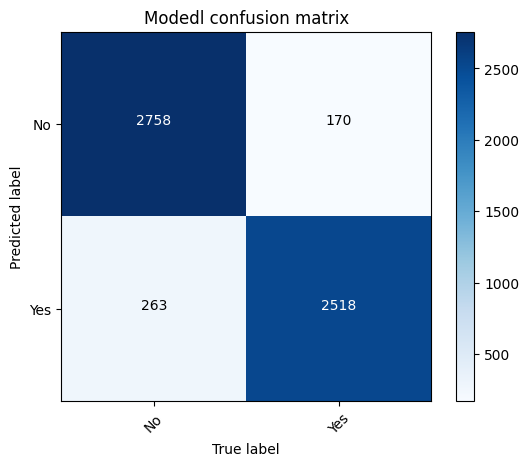

In [244]:
# https://github.com/SAP-samples/hana-ml-samples/blob/main/Python-API/usecase-examples/sapcommunity-hanaml-challenge/PAL%20Tutorial%20-%20Unified%20Classification%20Hybrid%20Gradient%20Boosting%20-%20PredictiveQuality%20Example.ipynb
# Visualize Confusion Matrix
import matplotlib.pyplot as plt
from hana_ml.visualizers.metrics import MetricsVisualizer
f, ax1 = plt.subplots(1,1)
mv1 = MetricsVisualizer(ax1, title = 'Modedl confusion matrix')
ax1 = mv1.plot_confusion_matrix(top_1_imp_ls[1].confusion_matrix_, normalize=False)


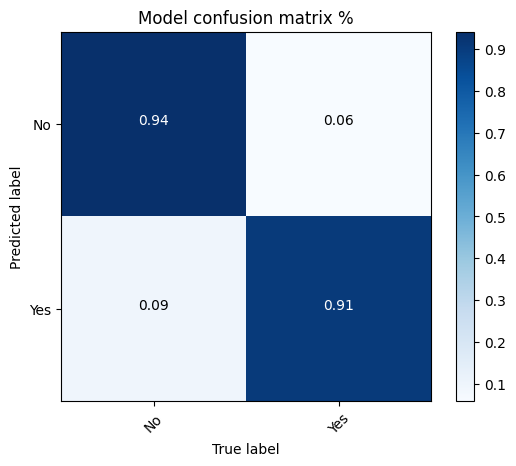

In [245]:
f, ax1 = plt.subplots(1,1)
mv1 = MetricsVisualizer(ax1, title = 'Model confusion matrix %')
ax1 = mv1.plot_confusion_matrix(top_1_imp_ls[1].confusion_matrix_, normalize=True)

In [246]:
d_test_bl.shape

[420, 47]

C:\Users\si\anaconda3\envs\ml_hana\lib\site-packages\hana_ml\visualizers\shap.py:1697: UserWarning: No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored
  plt.scatter(x, y,


1.Using Shapley values to show the distribution of the impacts each feature has on the model output.
2.The color represents the feature value (red high, blue low).
3.The plot below shows the relationship between feature value and Shapley value.
-- If the dots in the left area are blue and the dots in the right area are red, then it means that the feature value and the Shapley value are typically positive correlation.
-- If the dots in the left area are red and the dots in the right area are blue, then it means that the feature value and the Shapley value are typically negative correlation.
-- If all the dots are concentrated near 0, it means that the Shapley value has nothing to do with this feature.


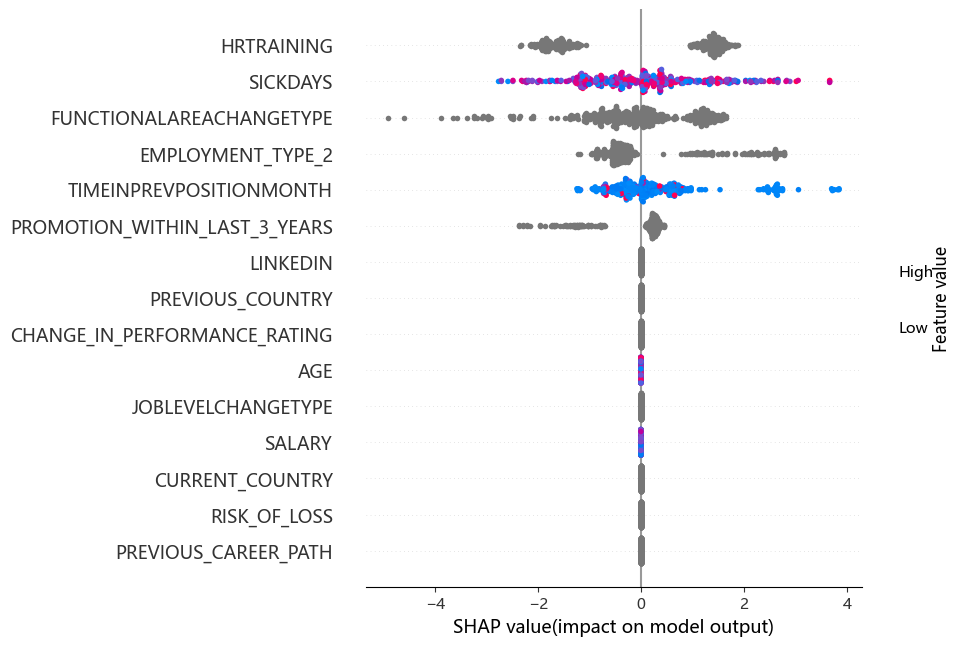

In [257]:
# https://pypi.org/project/hana-ml/
from hana_ml.visualizers.model_debriefing import TreeModelDebriefing
from hana_ml.visualizers.model_debriefing import TreeModelDebriefing

features_shapely = top_1_imp_ls[2] # Top 3 imp model
features_shapely = features_shapely[1:]
features_shapely = features_shapely[:-1]

pred_res_shapely = f_score_res(top_1_imp_ls[1], d_test_bl)[0]
shapley_explainer = TreeModelDebriefing.shapley_explainer(feature_data=d_test_bl.head(500).select(features_shapely),
                                                         reason_code_data=pred_res_shapely.head(500).select('REASON_CODE'))

shapley_explainer.summary_plot()


In [258]:
f_score_res(top_1_imp_ls[1],d_test_bl)[2].collect()

,ACTUAL_CLASS,PREDICTED_CLASS,COUNT
0,No,No,197
1,No,Yes,13
2,Yes,No,32
3,Yes,Yes,178


In [259]:
def f_cf_mx_values(p_model, p_d_test): 
    cf_mx = f_score_res(p_model,p_d_test)[2].collect()
    TN = cf_mx.loc[(cf_mx['ACTUAL_CLASS'] == 'No') & (cf_mx['PREDICTED_CLASS'] == 'No'),'COUNT']
    FP = cf_mx.loc[(cf_mx['ACTUAL_CLASS'] == 'No') & (cf_mx['PREDICTED_CLASS'] == 'Yes'),'COUNT']
    TP = cf_mx.loc[(cf_mx['ACTUAL_CLASS'] == 'Yes') & (cf_mx['PREDICTED_CLASS'] == 'Yes'),'COUNT']
    FN = cf_mx.loc[(cf_mx['ACTUAL_CLASS'] == 'Yes') & (cf_mx['PREDICTED_CLASS'] == 'No'),'COUNT']
    TP = TP.values[0]
    TN = TN.values[0]
    FP = FP.values[0]
    FN = FN.values[0]
    P = TP + FN
    N = TN + FP
    return TN, FP, FN, TP, P, N

In [260]:
TN, FP, FN, TP, P, N = f_cf_mx_values(top_1_imp_ls[1], d_test_bl)
TN, FP, FN, TP, P, N

(197, 13, 32, 178, 210, 210)

In [265]:
cf_matrix_ls = [TN, FP, FN, TP]

In [266]:
import numpy as np
cf_matrix = np.array(cf_matrix_ls).reshape(2,2)

<AxesSubplot: >

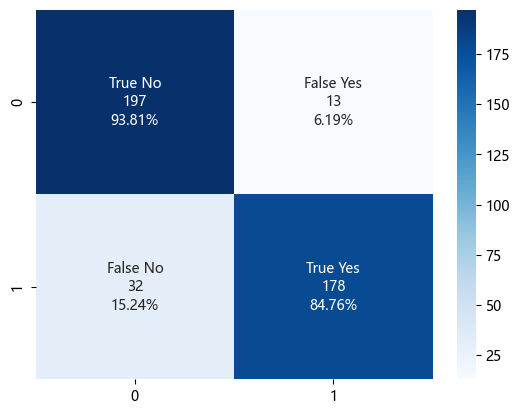

In [267]:
group_names = ['True No','False Yes','False No','True Yes']

group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]

group_percentages = ["{0:.2%}".format(2*value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts, group_percentages)]

labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')

In [268]:
# SUPPORT Yes = SUPOORT No - all statisitcs are reliable
f_score_res(top_1_imp_ls[1],d_test_bl)[1].collect()
# RECALL    Yes - True Yes. Hit. Underestimation
# PRECISION Yes - False alarm. Overestimation

,STAT_NAME,STAT_VALUE,CLASS_NAME
0,AUC,0.9498951247165532,None
1,RECALL,0.9380952380952381,No
2,PRECISION,0.8602620087336245,No
3,F1_SCORE,0.8974943052391801,No
4,SUPPORT,210,No
5,RECALL,0.8476190476190476,Yes
6,PRECISION,0.9319371727748691,Yes
7,F1_SCORE,0.8877805486284288,Yes
8,SUPPORT,210,Yes
9,ACCURACY,0.8928571428571429,None


In [269]:
# Further steps test with an increased number of percentage for test in split d_test to check accuracy
# Check HGBT trending parameters
# Save list of models

In [270]:
# END sound
import winsound
for i in range(100):
    winsound.PlaySound("beep.wav", winsound.SND_FILENAME)